In [1]:
import pyspark
from pyspark.sql.functions import col, to_timestamp
from pyspark.sql import SparkSession
import os
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType

train_directory = "/Users/evangelosgeraridis/Desktop/MEAZON/September 2022"
test_directory = "/Users/evangelosgeraridis/Desktop/MEAZON/October 2022"

options = {
    "header": "true",
    "sep": ",",
    "multiLine": "true",
    "quote": "\"",
    "escape": "\"",
    "ignoreTrailingWhiteSpace": True
}

train_dataframes = {}
test_dataframes = {}

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Spark_Grated_Boosted_Trees_Meazon_timeperiod.com") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

import logging
spark.sparkContext.setLogLevel("ERROR")
logging.getLogger("py4j").setLevel(logging.ERROR)

# Process train data
for file in os.listdir(train_directory):
    file_path = os.path.join(train_directory, file)
    if os.path.isfile(file_path) and file.endswith(".csv"):
        df = spark.read.options(**options).csv(file_path)
        train_dataframes[file] = df

# Process test data
for file in os.listdir(test_directory):
    file_path = os.path.join(test_directory, file)
    if os.path.isfile(file_path) and file.endswith(".csv"):
        df = spark.read.options(**options).csv(file_path)
        test_dataframes[file] = df


23/06/12 08:39:07 WARN Utils: Your hostname, Evangeloss-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.2.5 instead (on interface en0)
23/06/12 08:39:07 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/06/12 08:39:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
entry_counts = []

# Count entries in train DataFrames
for name, df in train_dataframes.items():
    count_value = df.count()
    entry_counts.append(count_value)
    print("Number of entries in", name, ":", count_value)

# Find the minimum count
min_count = min(entry_counts)
print("Minimum count of entries:", min_count)


Number of entries in washing_machineS.csv : 81076
Number of entries in AggregatedS.csv : 317099
Number of entries in dishwasherS.csv : 37314
Number of entries in water_heaterS.csv : 317099
Number of entries in fridgeS.csv : 79577
Number of entries in microwaveS.csv : 70790
Number of entries in hotplateS.csv : 36615
Minimum count of entries: 36615


In [3]:
entry_counts = []

# Count entries in train DataFrames
for name, df in test_dataframes.items():
    count_value = df.count()
    entry_counts.append(count_value)
    print("Number of entries in", name, ":", count_value)

# Find the minimum count
min_count = min(entry_counts)
print("Minimum count of entries:", min_count)


Number of entries in microwaveO.csv : 23901
Number of entries in hotplateO.csv : 16042
Number of entries in fridgeO.csv : 39472
Number of entries in water_heaterO.csv : 198602
Number of entries in dishwasherO.csv : 16852
Number of entries in AggregatedO.csv : 198602
Number of entries in washing_machineO.csv : 42037
Minimum count of entries: 16042


In [4]:
limited_train_dataframes = {}

# Apply the limit to each train DataFrame
for key, df in train_dataframes.items():
    limited_train_dataframes[key] = df.limit(36615)


In [5]:
limited_test_dataframes = {}

# Apply the limit to each train DataFrame
for key, df in test_dataframes.items():
    limited_test_dataframes[key] = df.limit(16042)


In [6]:
washing_machine_train = limited_train_dataframes['washing_machineS.csv'].drop('ts').dropna()
aggregated_train = limited_train_dataframes['AggregatedS.csv'].drop('ts').dropna()
dishwasher_train = limited_train_dataframes['dishwasherS.csv'].drop('ts').dropna()
water_heater_train = limited_train_dataframes['water_heaterS.csv'].drop('ts').dropna()
fridge_train = limited_train_dataframes['fridgeS.csv'].drop('ts').dropna()
microwave_train = limited_train_dataframes['microwaveS.csv'].drop('ts').dropna()
hotplate_train = limited_train_dataframes['hotplateS.csv'].drop('ts').dropna()

In [7]:
washing_machine_test = limited_test_dataframes['washing_machineO.csv'].drop('ts').dropna()
aggregated_test = limited_test_dataframes['AggregatedO.csv'].drop('ts').dropna()
dishwasher_test = limited_test_dataframes['dishwasherO.csv'].drop('ts').dropna()
water_heater_test = limited_test_dataframes['water_heaterO.csv'].drop('ts').dropna()
fridge_test = limited_test_dataframes['fridgeO.csv'].drop('ts').dropna()
microwave_test = limited_test_dataframes['microwaveO.csv'].drop('ts').dropna()
hotplate_test = limited_test_dataframes['hotplateO.csv'].drop('ts').dropna()

In [8]:
dataframes = [fridge_train,fridge_test,dishwasher_train,dishwasher_test,hotplate_train,hotplate_test,microwave_train,microwave_test,
            washing_machine_train,washing_machine_test ,water_heater_train,water_heater_test,aggregated_train,aggregated_test]

modified_dataframes = []
for df in dataframes:
    for column in df.columns:
        df = df.withColumn(column, col(column).cast(DoubleType()))

    # Append the modified dataframe to the new list
    modified_dataframes.append(df)

# Assign the modified dataframes back to individual variables
fridge_train,fridge_test,dishwasher_train,dishwasher_test,hotplate_train,hotplate_test,microwave_train,microwave_test, washing_machine_train,washing_machine_test ,water_heater_train,water_heater_test,aggregated_train,aggregated_test= modified_dataframes

for df in modified_dataframes:
    df = df.dropna()
    df.show(20)
    df.printSchema()
    print(df.count())


+-------+-------+-----+-------+-----+
|   pwrA|  apwrA| curA|   vltA|screA|
+-------+-------+-----+-------+-----+
|126.163| 200.32|0.912|220.036|0.754|
|126.112|  200.1|0.913|219.542|0.753|
|126.236|199.859|0.911|219.856| 0.76|
|126.321|200.896|0.915|220.039|0.755|
|126.341|202.959|0.922| 220.45|0.786|
|126.231| 201.28|0.911| 221.45|0.773|
| 25.111| 42.974|0.196|220.772|0.258|
| 16.665| 20.602|0.094|220.762|  0.9|
| 15.262| 15.951|0.072|220.778|0.668|
| 14.963| 15.163|0.069|220.781|1.007|
| 14.964| 15.111|0.069|220.793|0.701|
| 14.955| 15.118|0.069|220.797|0.695|
|   14.8| 14.888|0.068|220.739|0.702|
| 14.789| 14.872|0.068|220.745|0.708|
| 14.626| 14.723|0.067|220.739|0.707|
| 14.756| 14.904|0.068|220.732|0.699|
| 14.623|   14.7|0.067|220.711|0.708|
| 14.617| 14.755|0.067|220.667|0.714|
| 14.669| 14.908|0.068|220.602|0.912|
| 14.846|  15.04|0.068|220.643| 0.69|
+-------+-------+-----+-------+-----+
only showing top 20 rows

root
 |-- pwrA: double (nullable = true)
 |-- apwrA: double (n

In [50]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the fridge device
input_cols_fridge = aggregated_train.columns
output_cols_fridge = fridge_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_fridge, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_fridge:
    # Create a new rf model with the corresponding label column
    gbt = GBTRegressor(featuresCol='scaled_features', labelCol=output_col, maxIter=30,maxDepth=15 )
    
    # Update the stages of the pipeline with the new gbt model
    pipeline.setStages([assembler, scaler, gbt])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on fridge_test dataset
    predictions = pipeline_model.transform(fridge_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']

predicted_values_pwrA = predicted_values_pwrA.toPandas()
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()


Metrics for pwrA:
RMSE: 40.23991703186306
MSE: 1619.2509227312228
MAE: 21.11860035890218
R2: 0.9806091599391143

Metrics for apwrA:
RMSE: 63.91069267324054
MSE: 4084.5766379734023
MAE: 40.92263011590027
R2: 0.9610784846787204

Metrics for curA:
RMSE: 0.2885536345862001
MSE: 0.08326320003290628
MAE: 0.18561819091189805
R2: 0.9612858667013261

Metrics for vltA:
RMSE: 0.24292010337102793
MSE: 0.059010176621790894
MAE: 0.13472050585355547
R2: 0.986521878923868

Metrics for screA:
RMSE: 0.2708668652430041
MSE: 0.07336885868657173
MAE: 0.24556180131931304
R2: -3.3308404495083366



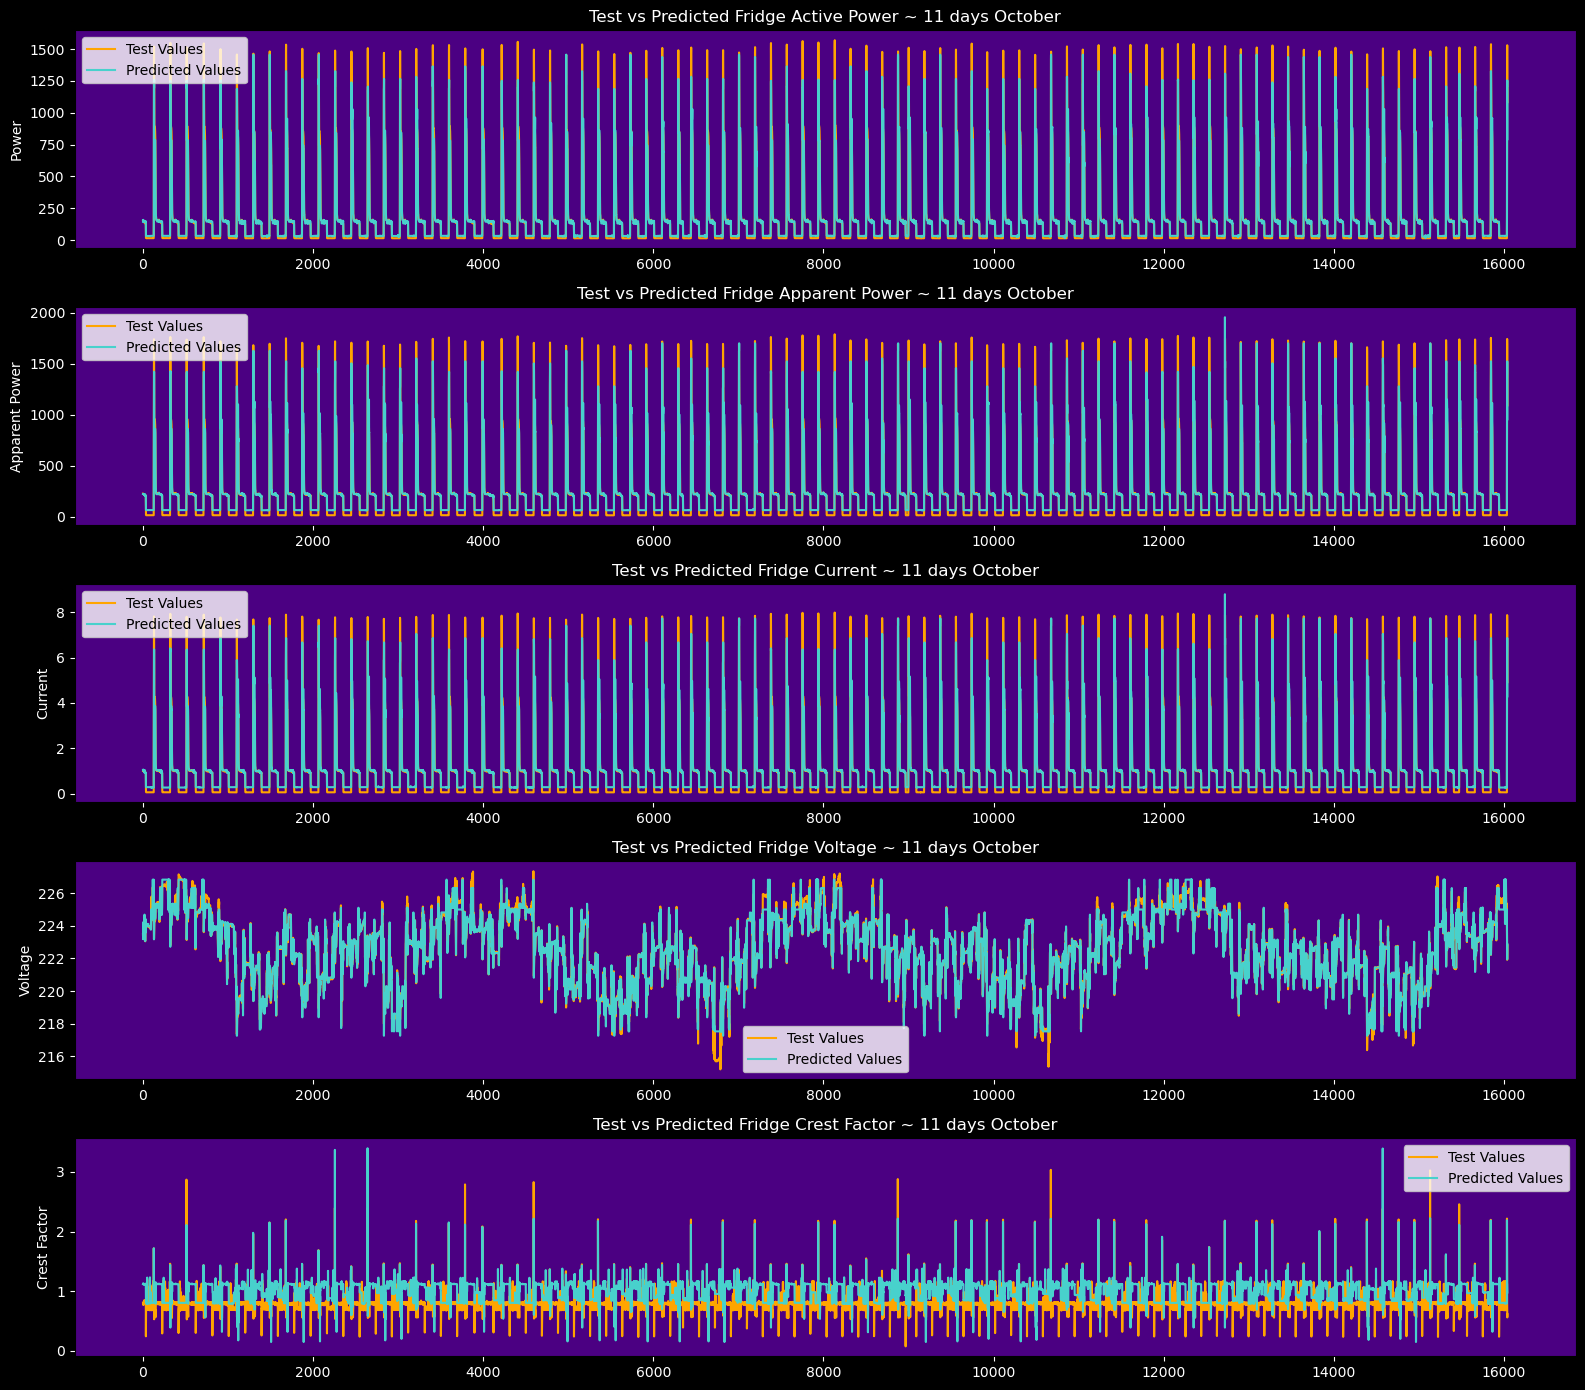

In [51]:

import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Fridge Active Power ~ 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Fridge Apparent Power ~ 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Fridge Current ~ 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Fridge Voltage ~ 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Fridge Crest Factor ~ 11 days October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


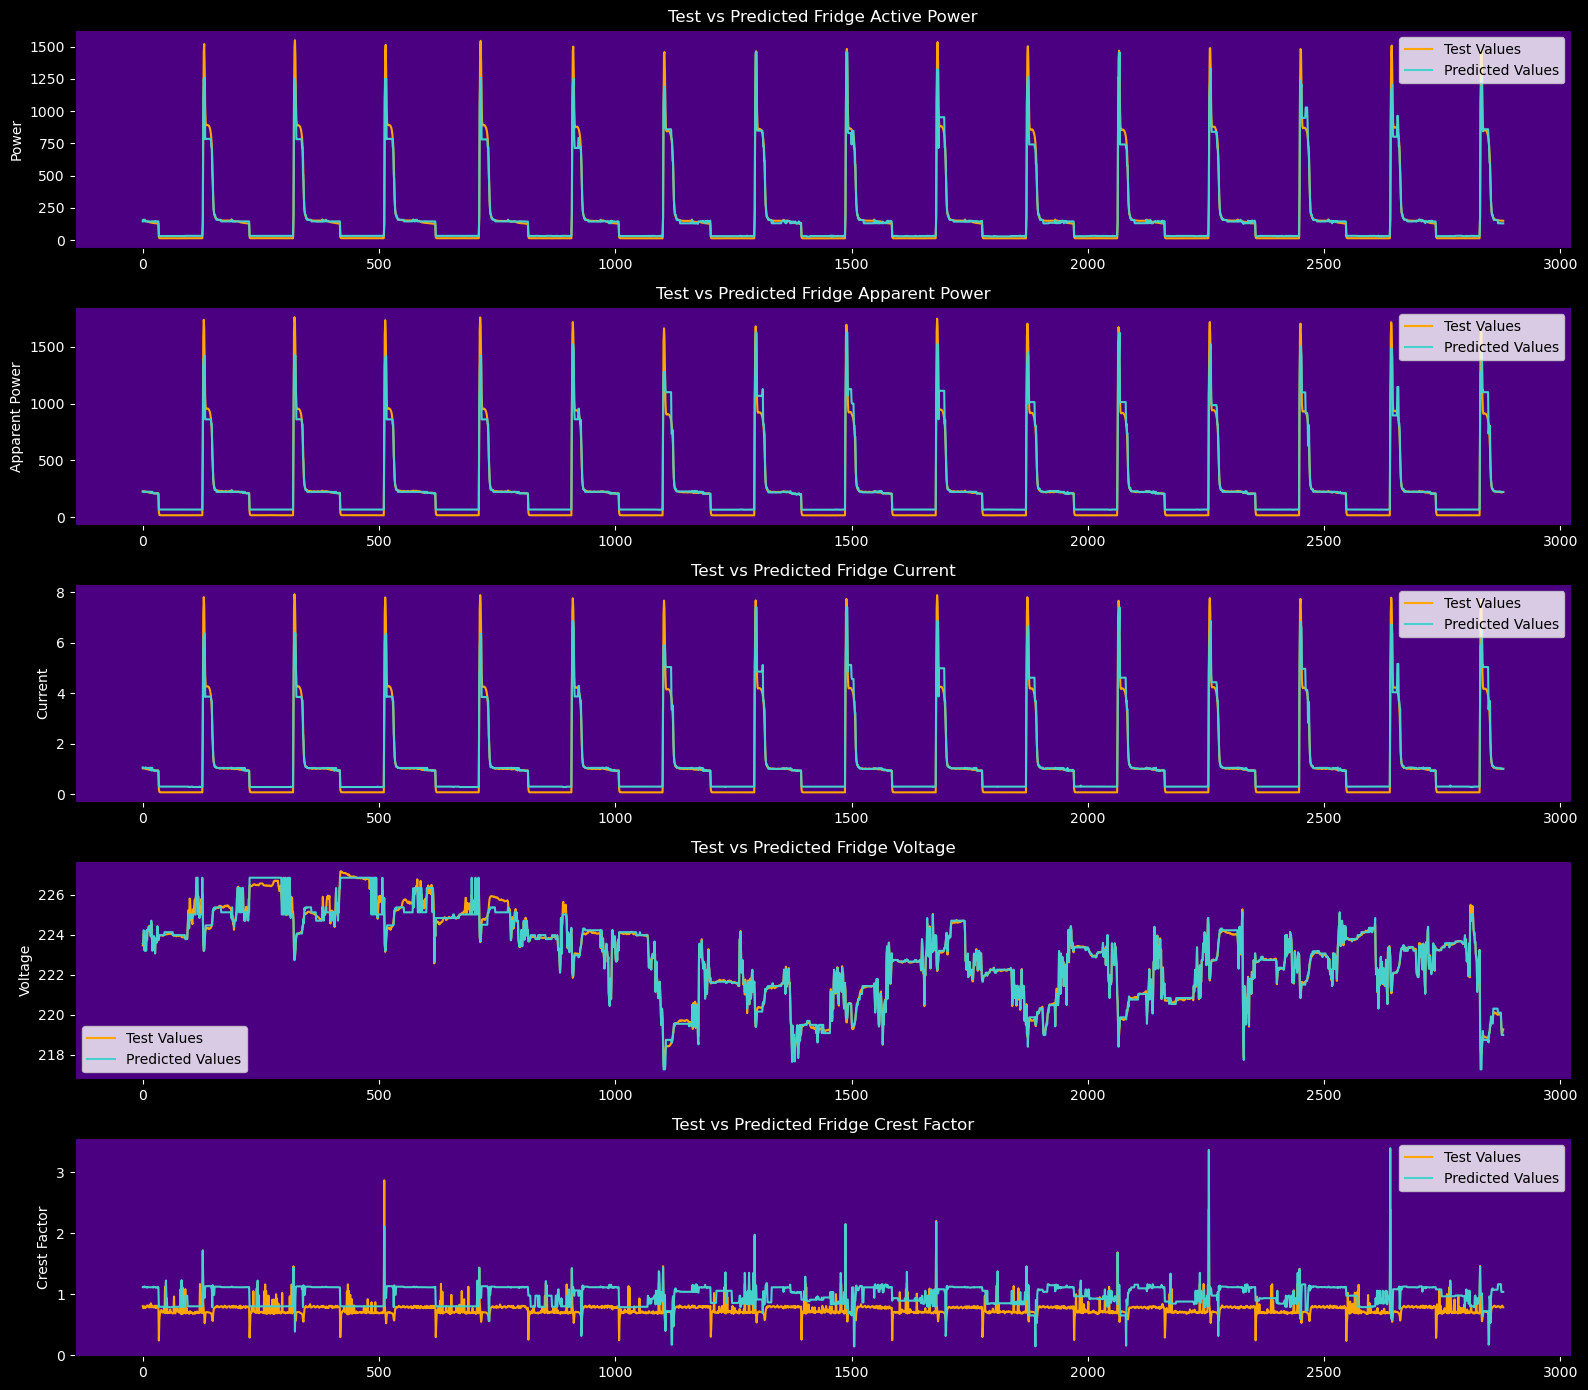

In [52]:
# now let us isolate the first two days of october from the test fridge to have a closer look. If 1 sample is approximately
# taken every minute, here we would need about 2880 entries




import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Fridge Active Power',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Fridge Apparent Power',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Fridge Current',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Fridge Voltage',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Fridge Crest Factor',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


# Create subplots for each column


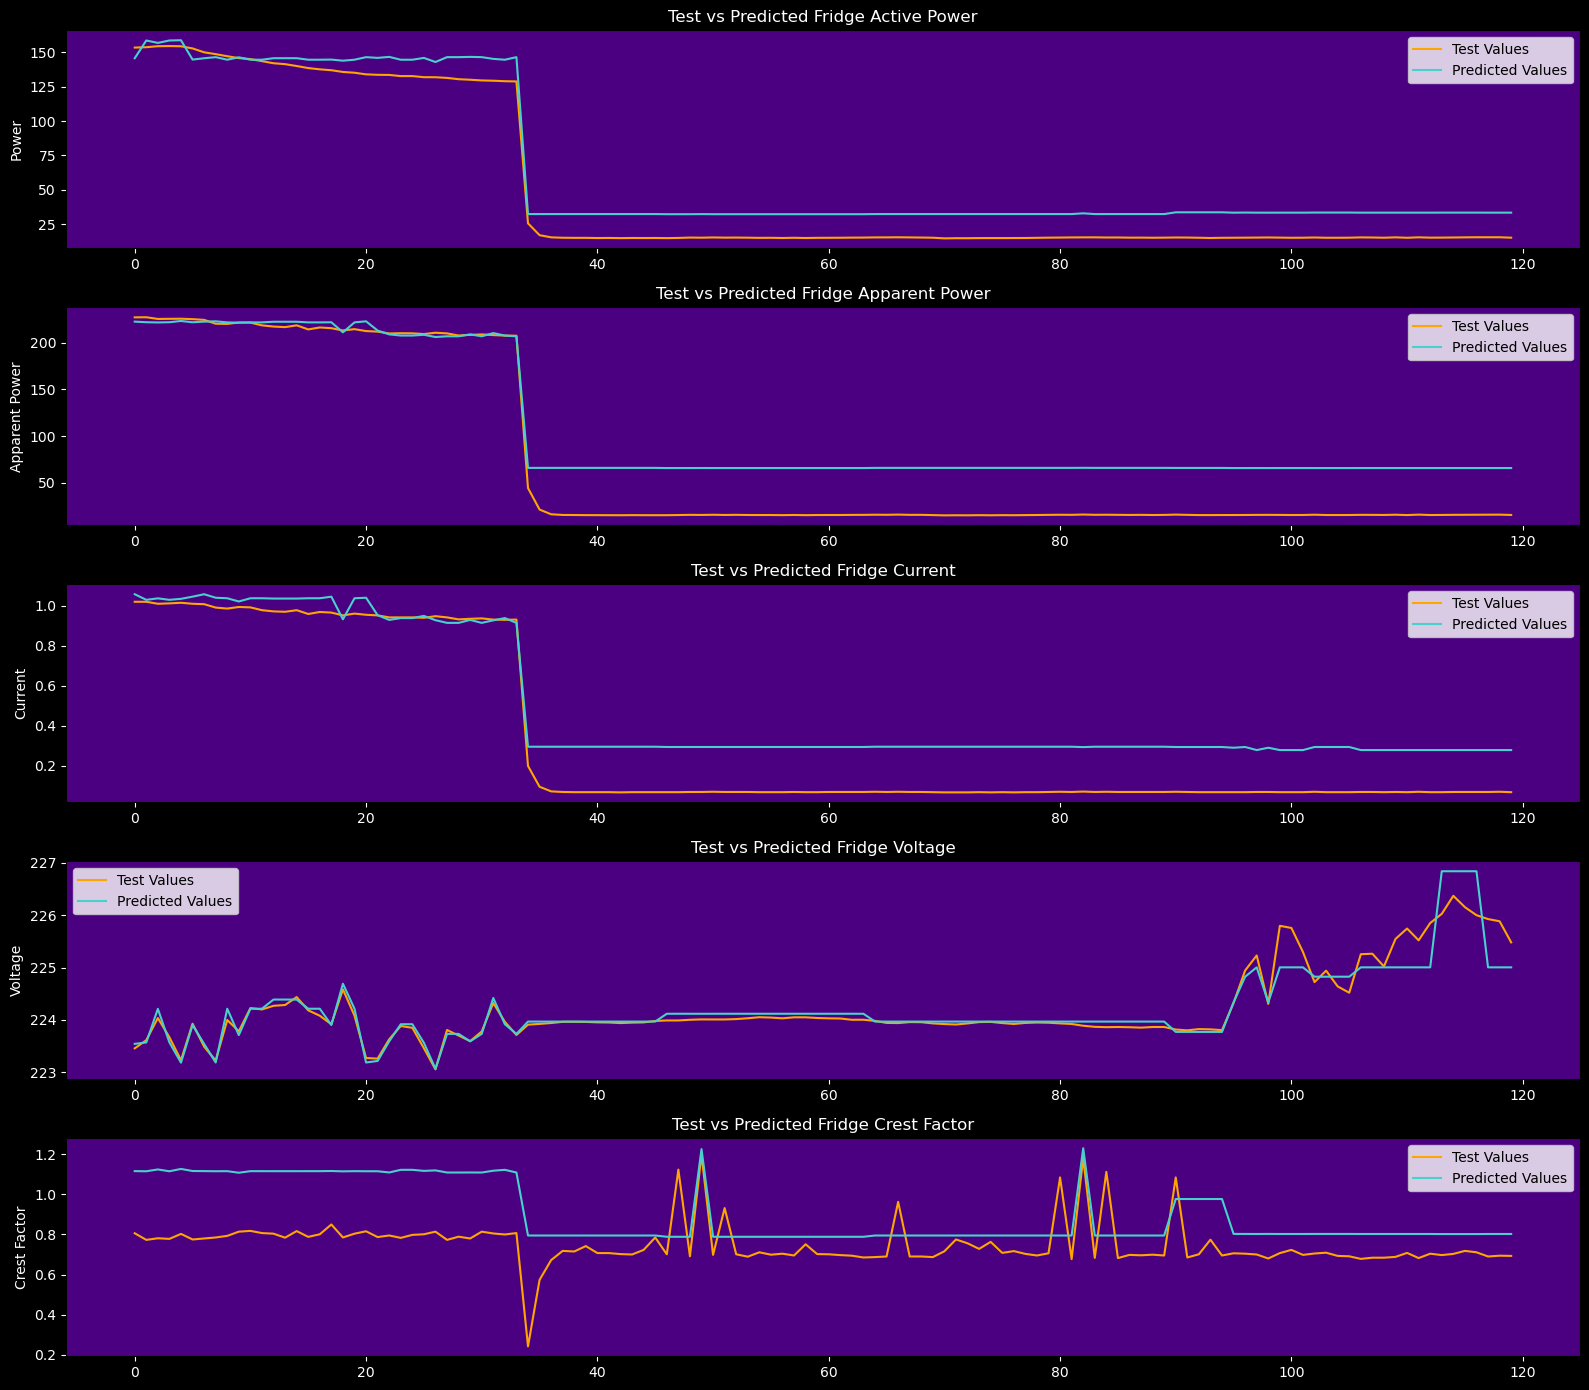

In [53]:
# and let us see for the first two hours 120 entries approximately


# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:120], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:120], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Fridge Active Power',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:120], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:120], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Fridge Apparent Power',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:120], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:120], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Fridge Current',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:120], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:120], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Fridge Voltage',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:120], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:120], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Fridge Crest Factor',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


# Create subplots for each column


In [25]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the washing_machine device
input_cols_washing_machine = aggregated_train.columns
output_cols_washing_machine = washing_machine_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_washing_machine, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_washing_machine:
    # Create a new rf model with the corresponding label column
    gbt = GBTRegressor(featuresCol='scaled_features', labelCol=output_col, maxIter=30,maxDepth=15 )
    
    # Update the stages of the pipeline with the new gbt model
    pipeline.setStages([assembler, scaler, gbt])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on washing_machine_test dataset
    predictions = pipeline_model.transform(washing_machine_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']

predicted_values_pwrA = predicted_values_pwrA.toPandas()
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()


Metrics for pwrA:
RMSE: 411.09409108076943
MSE: 168998.35172152397
MAE: 160.01689529251468
R2: 0.6873627712434317

Metrics for apwrA:
RMSE: 426.51206581516783
MSE: 181912.54228592204
MAE: 181.23862444595807
R2: 0.6636737921352813

Metrics for curA:
RMSE: 1.9446474954172457
MSE: 3.7816538814325664
MAE: 0.8259448204434805
R2: 0.666424968813006

Metrics for vltA:
RMSE: 0.2788309368040322
MSE: 0.0777466913190142
MAE: 0.1485508267167785
R2: 0.9837874352479944

Metrics for screA:
RMSE: 0.21669670200455507
MSE: 0.04695746065965094
MAE: 0.1399348193622196
R2: 0.6049118053063494



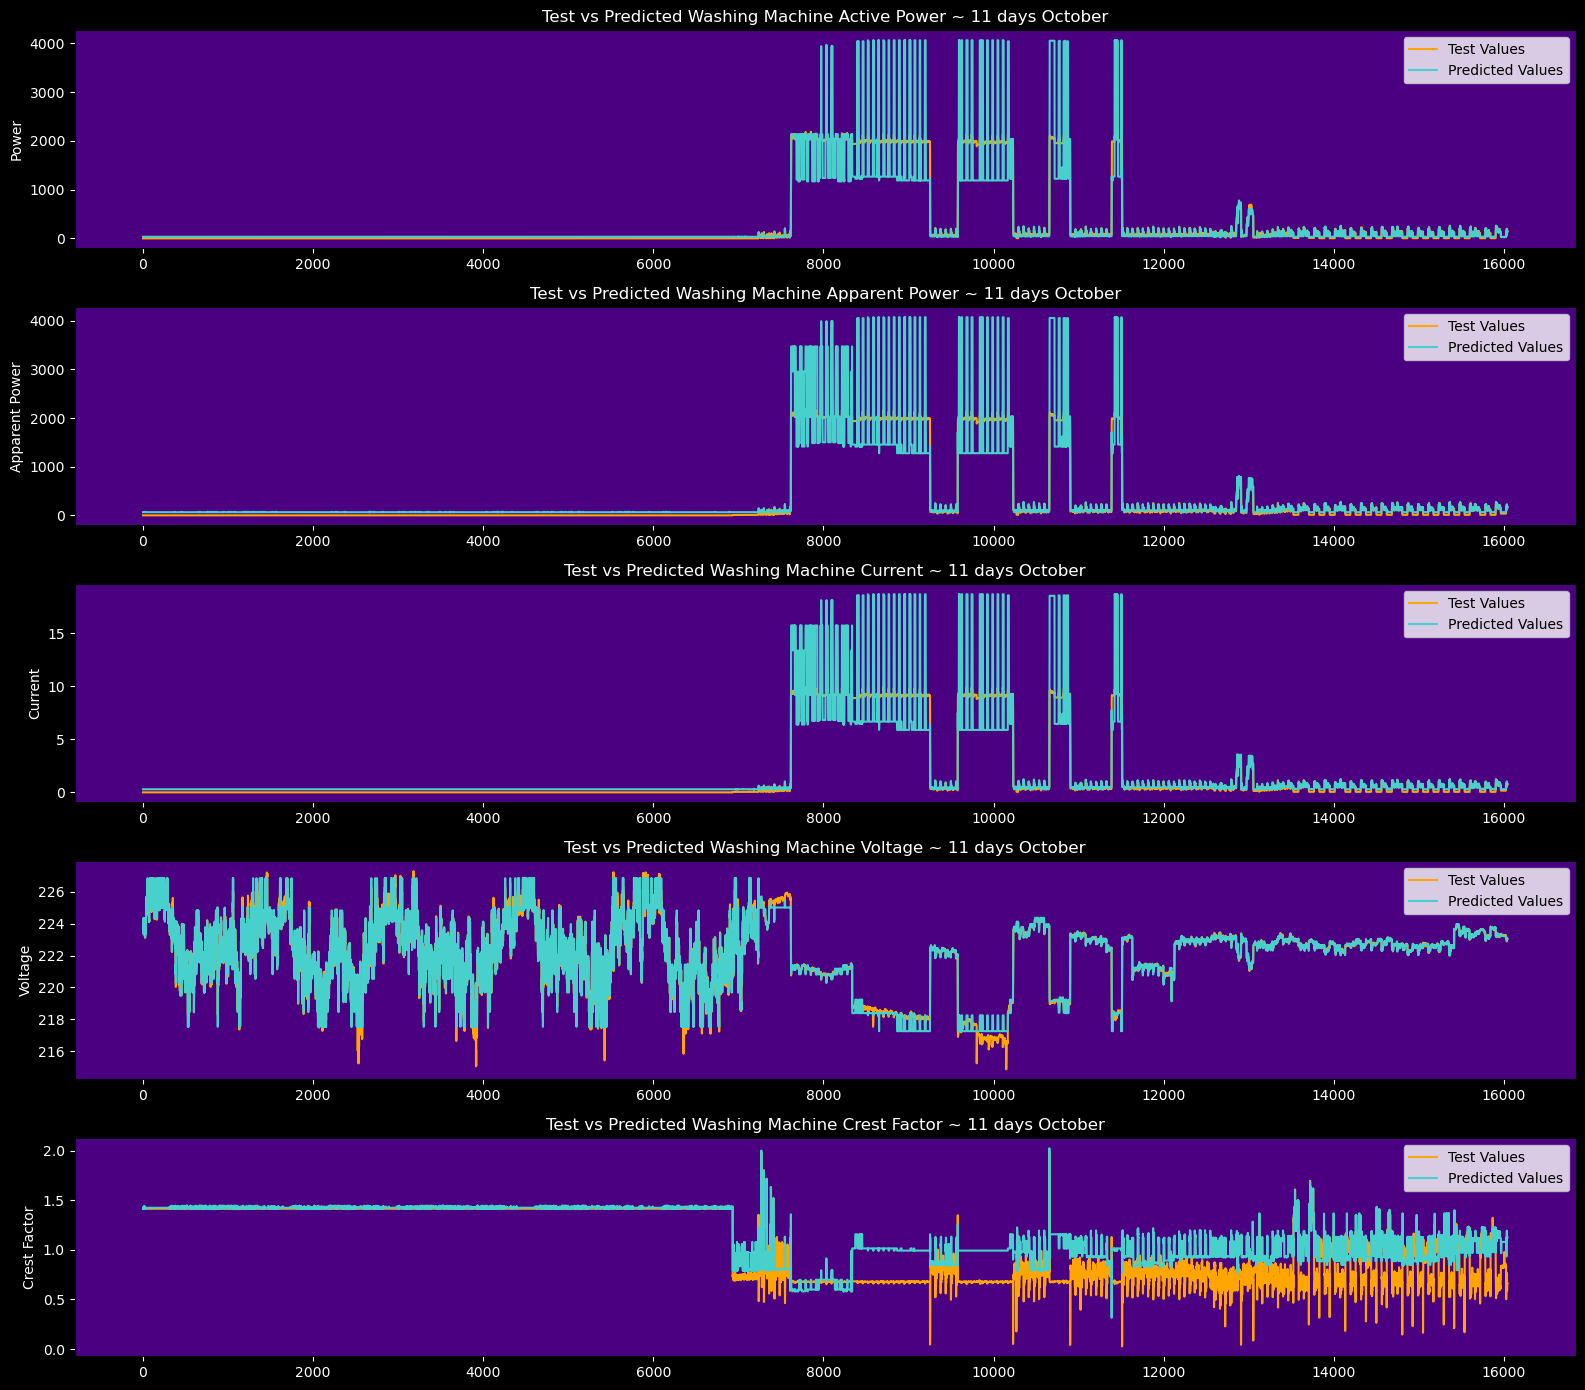

In [26]:

import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Washing Machine Active Power ~ 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Washing Machine Apparent Power ~ 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Washing Machine Current ~ 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Washing Machine Voltage ~ 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Washing Machine Crest Factor ~ 11 days October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


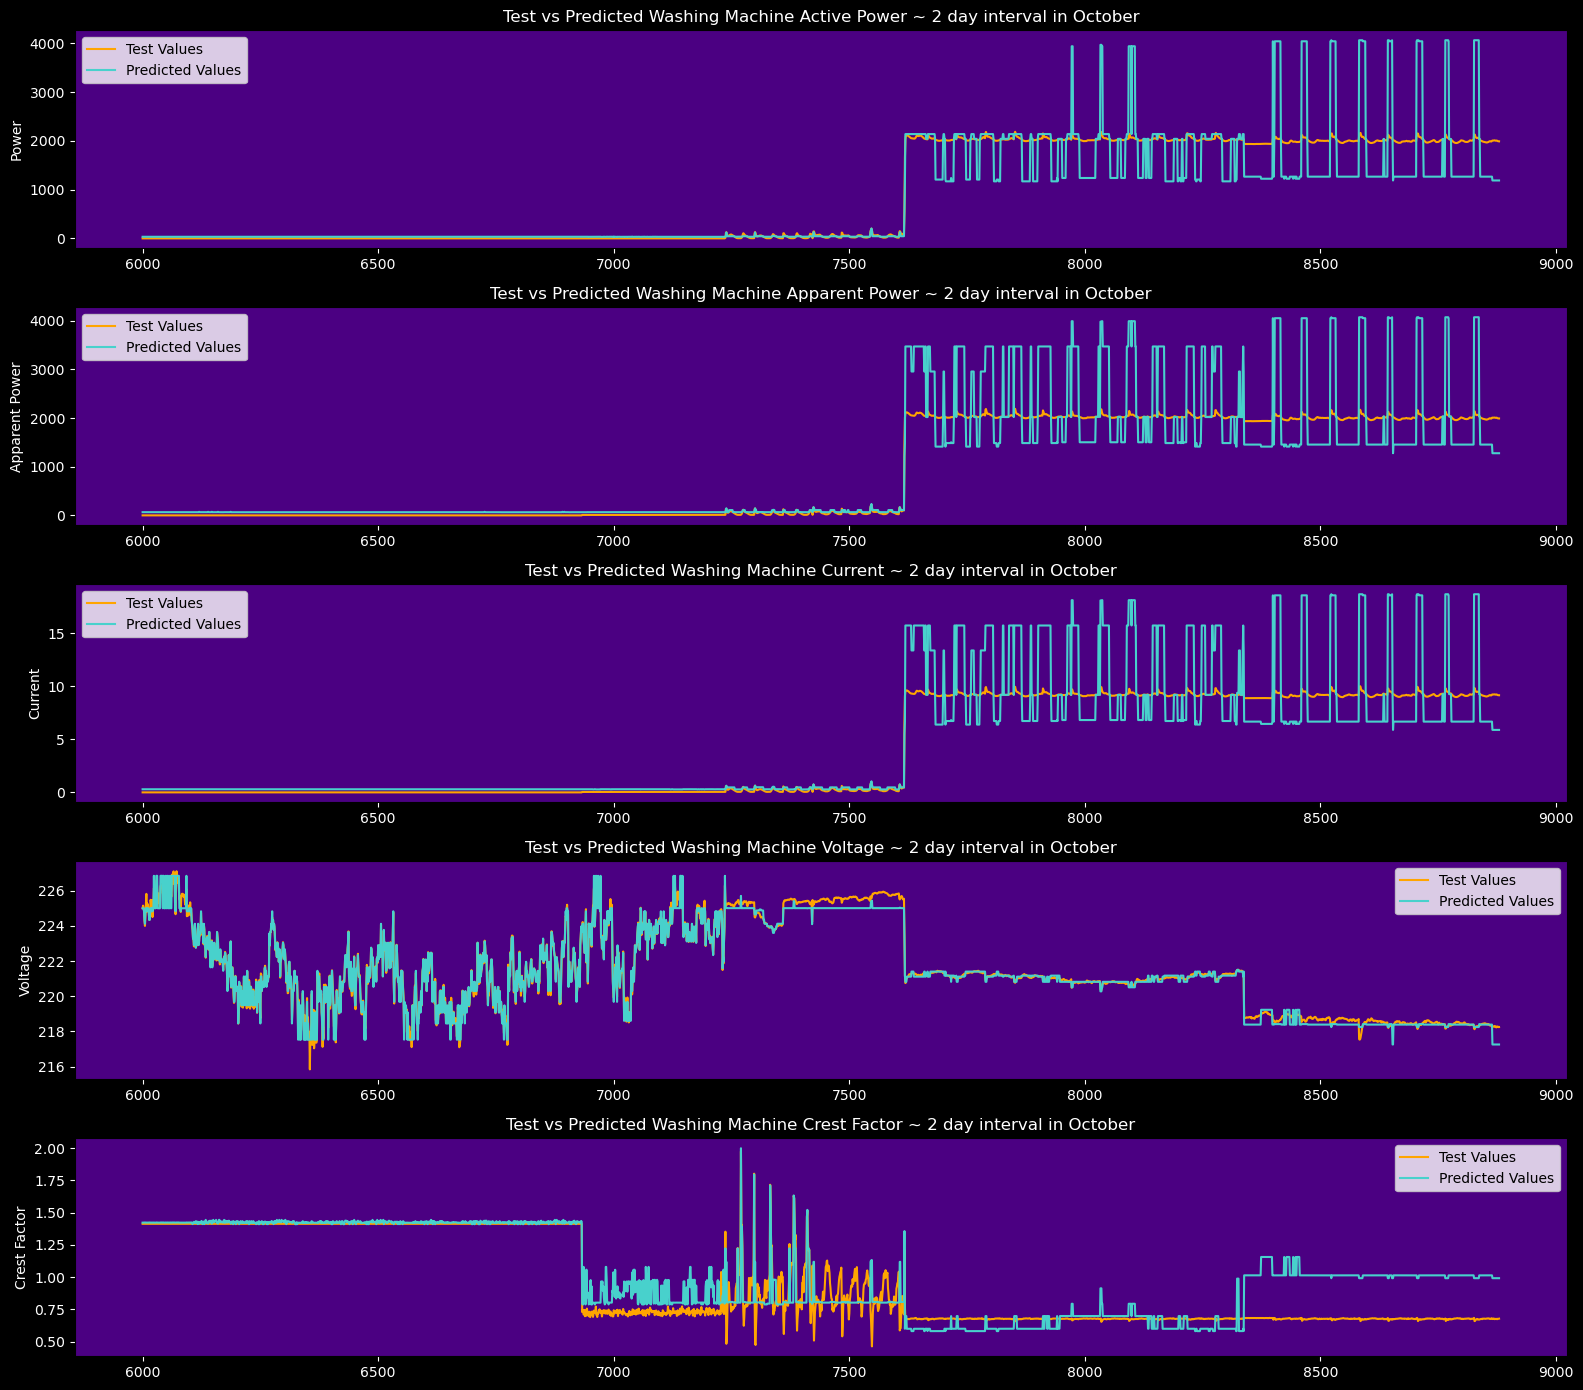

In [30]:
# now we will move to the time interval (about 2 days from 6000 timestep to 8880), since there are plenty
# of changes as seen in the plot especially on the aggregated power


import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[6000:8880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[6000:8880], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Washing Machine Active Power ~ 2 day interval in October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[6000:8880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[6000:8880], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Washing Machine Apparent Power ~ 2 day interval in October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[6000:8880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[6000:8880], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Washing Machine Current ~ 2 day interval in October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[6000:8880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[6000:8880], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Washing Machine Voltage ~ 2 day interval in October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[6000:8880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[6000:8880], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Washing Machine Crest Factor ~ 2 day interval in October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


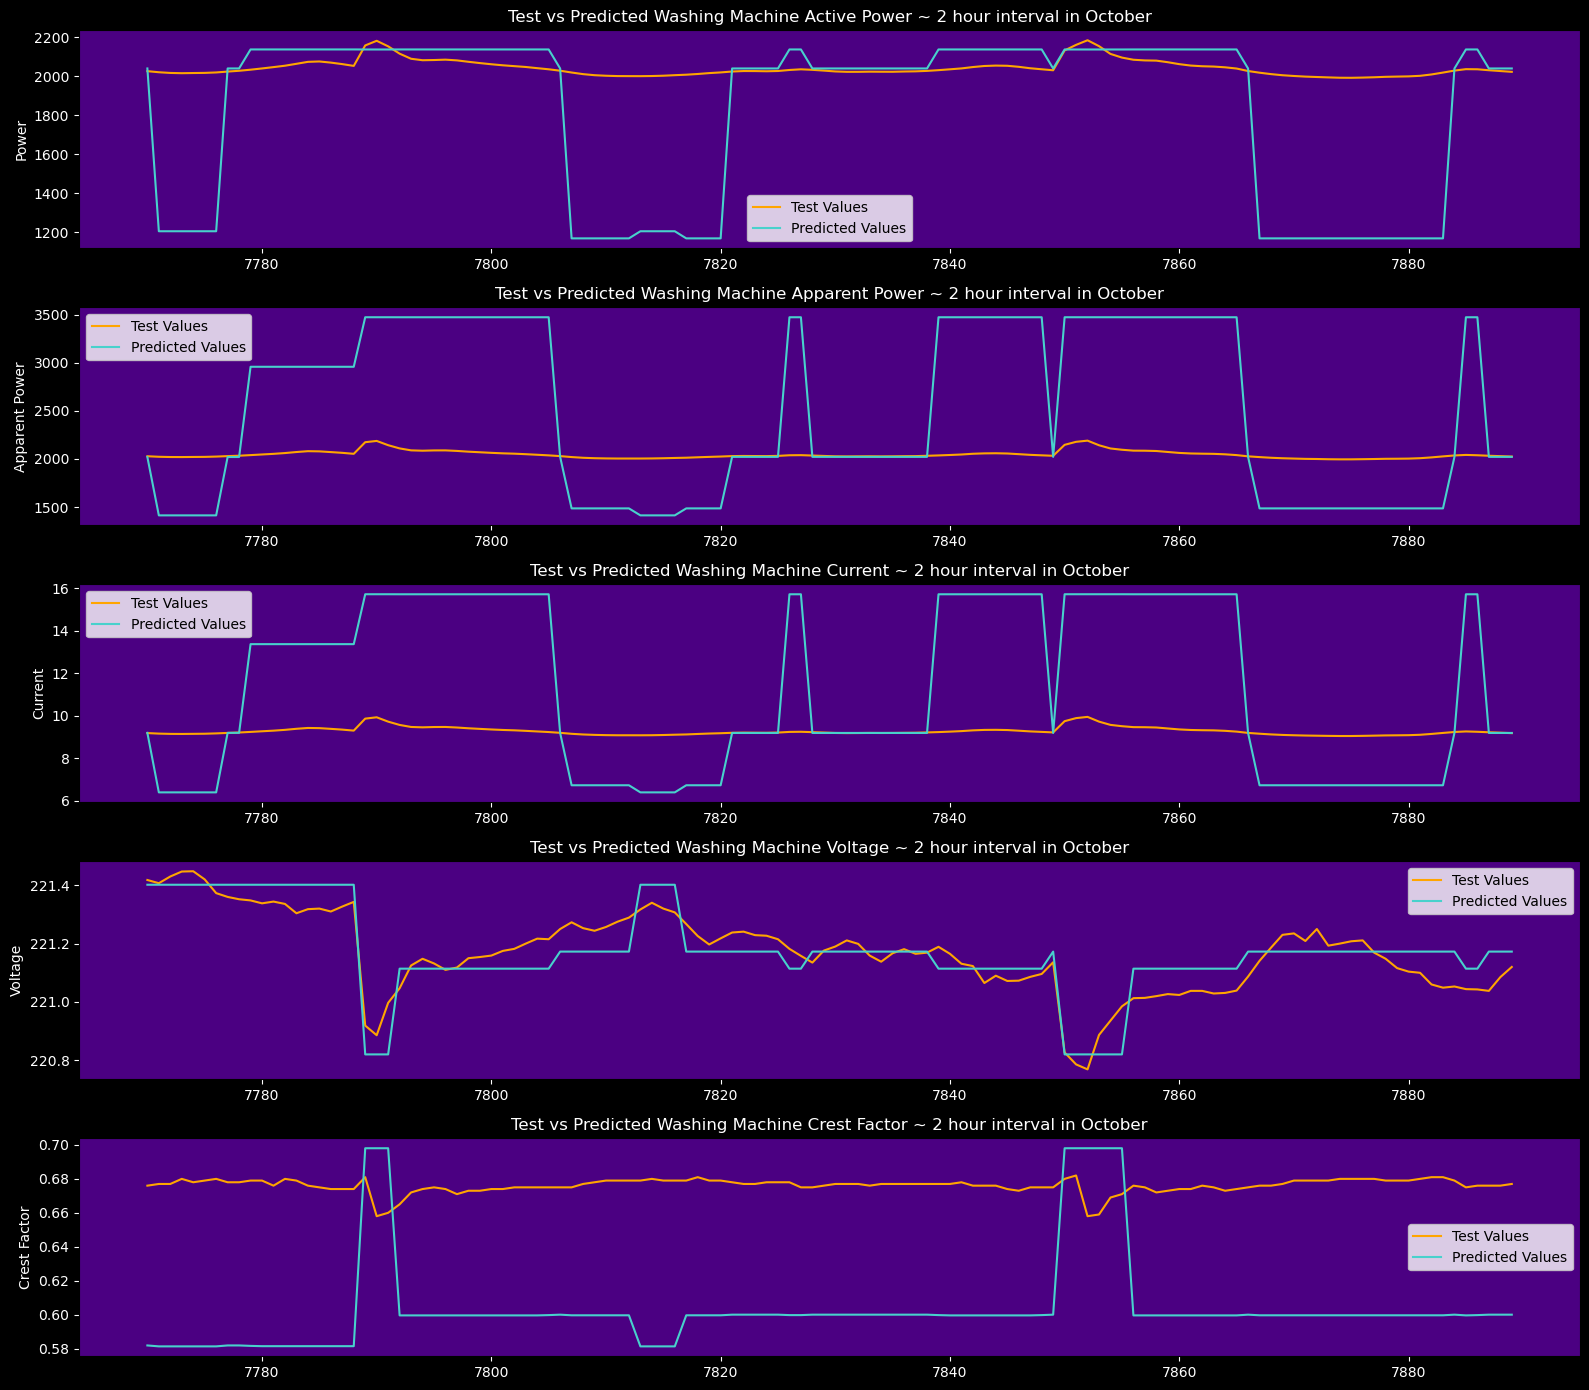

In [31]:
# the predictions are ok even for a device such as washing machine that can be activated any day any time.
# let's move to a 2 hour interval ,let's pick 7770 to 7890

# now we will move to the time interval (about 2 days from 6000 timestep to 8880), since there are plenty
# of changes as seen in the plot especially on the aggregated power


import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[7770:7890], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[7770:7890], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Washing Machine Active Power ~ 2 hour interval in October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[7770:7890], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[7770:7890], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Washing Machine Apparent Power ~ 2 hour interval in October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[7770:7890], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[7770:7890], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Washing Machine Current ~ 2 hour interval in October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[7770:7890], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[7770:7890], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Washing Machine Voltage ~ 2 hour interval in October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[7770:7890], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[7770:7890], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Washing Machine Crest Factor ~ 2 hour interval in October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [32]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the microwave device
input_cols_microwave = aggregated_train.columns
output_cols_microwave = microwave_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_microwave, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_microwave:
    # Create a new rf model with the corresponding label column
    gbt = GBTRegressor(featuresCol='scaled_features', labelCol=output_col, maxIter=30,maxDepth=15 )
    
    # Update the stages of the pipeline with the new gbt model
    pipeline.setStages([assembler, scaler, gbt])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on microwave_test dataset
    predictions = pipeline_model.transform(microwave_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']

predicted_values_pwrA = predicted_values_pwrA.toPandas()
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()


Metrics for pwrA:
RMSE: 69.71906554532028
MSE: 4860.748100512666
MAE: 34.69100258759606
R2: 0.9591619791315366

Metrics for apwrA:
RMSE: 74.27205729351054
MSE: 5516.338494610512
MAE: 60.826202513769594
R2: 0.9666705609833686

Metrics for curA:
RMSE: 0.3434181384681202
MSE: 0.11793601782890897
MAE: 0.29189837071725167
R2: 0.9649339238800785

Metrics for vltA:
RMSE: 0.3191002852975638
MSE: 0.1018249920769866
MAE: 0.1946322307428883
R2: 0.9819488472532104

Metrics for screA:
RMSE: 0.2572890687822694
MSE: 0.06619766491484738
MAE: 0.16984495319427426
R2: -1.3471940676780303



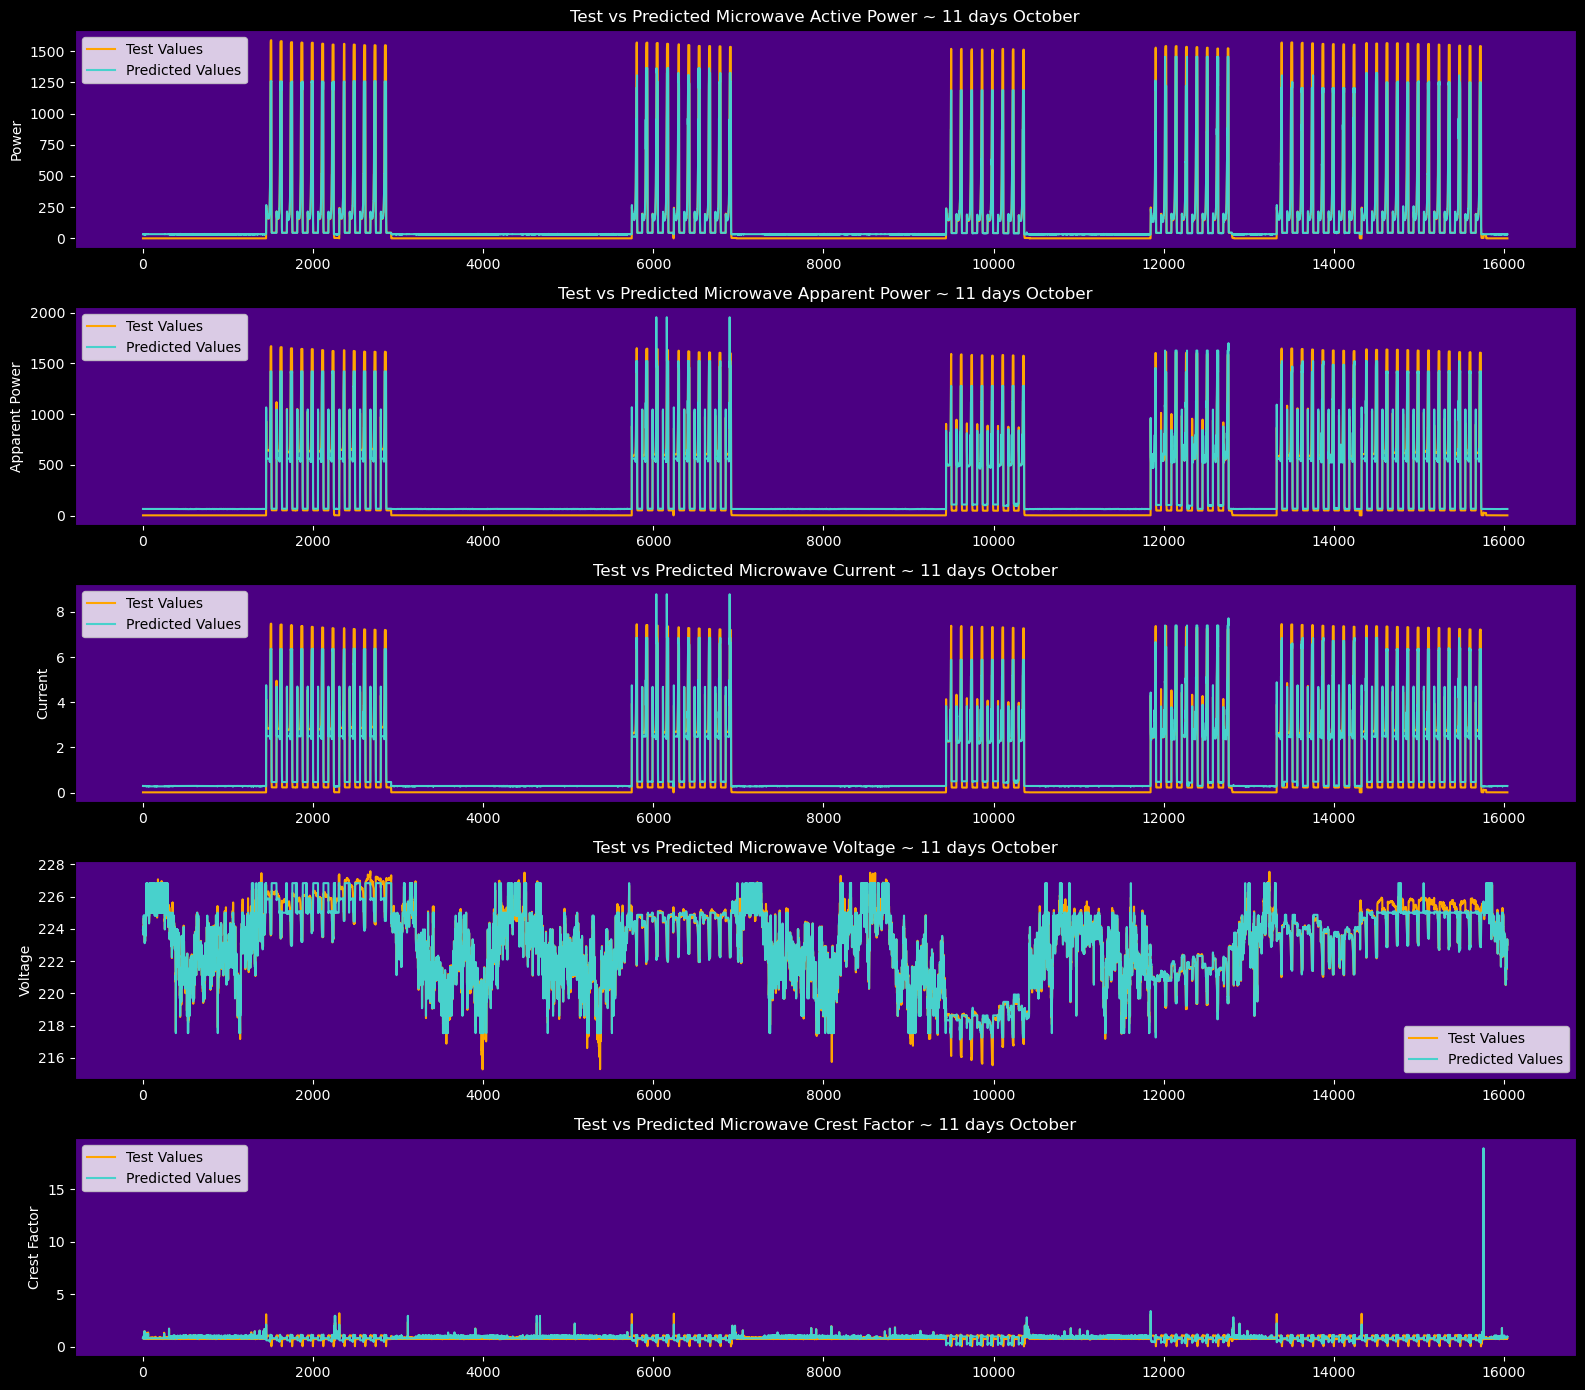

In [33]:
# ~ 11 first Oct days
import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(16, 14))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Microwave Active Power ~ 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Microwave Apparent Power ~ 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Microwave Current ~ 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Microwave Voltage ~ 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Microwave Crest Factor ~ 11 days October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


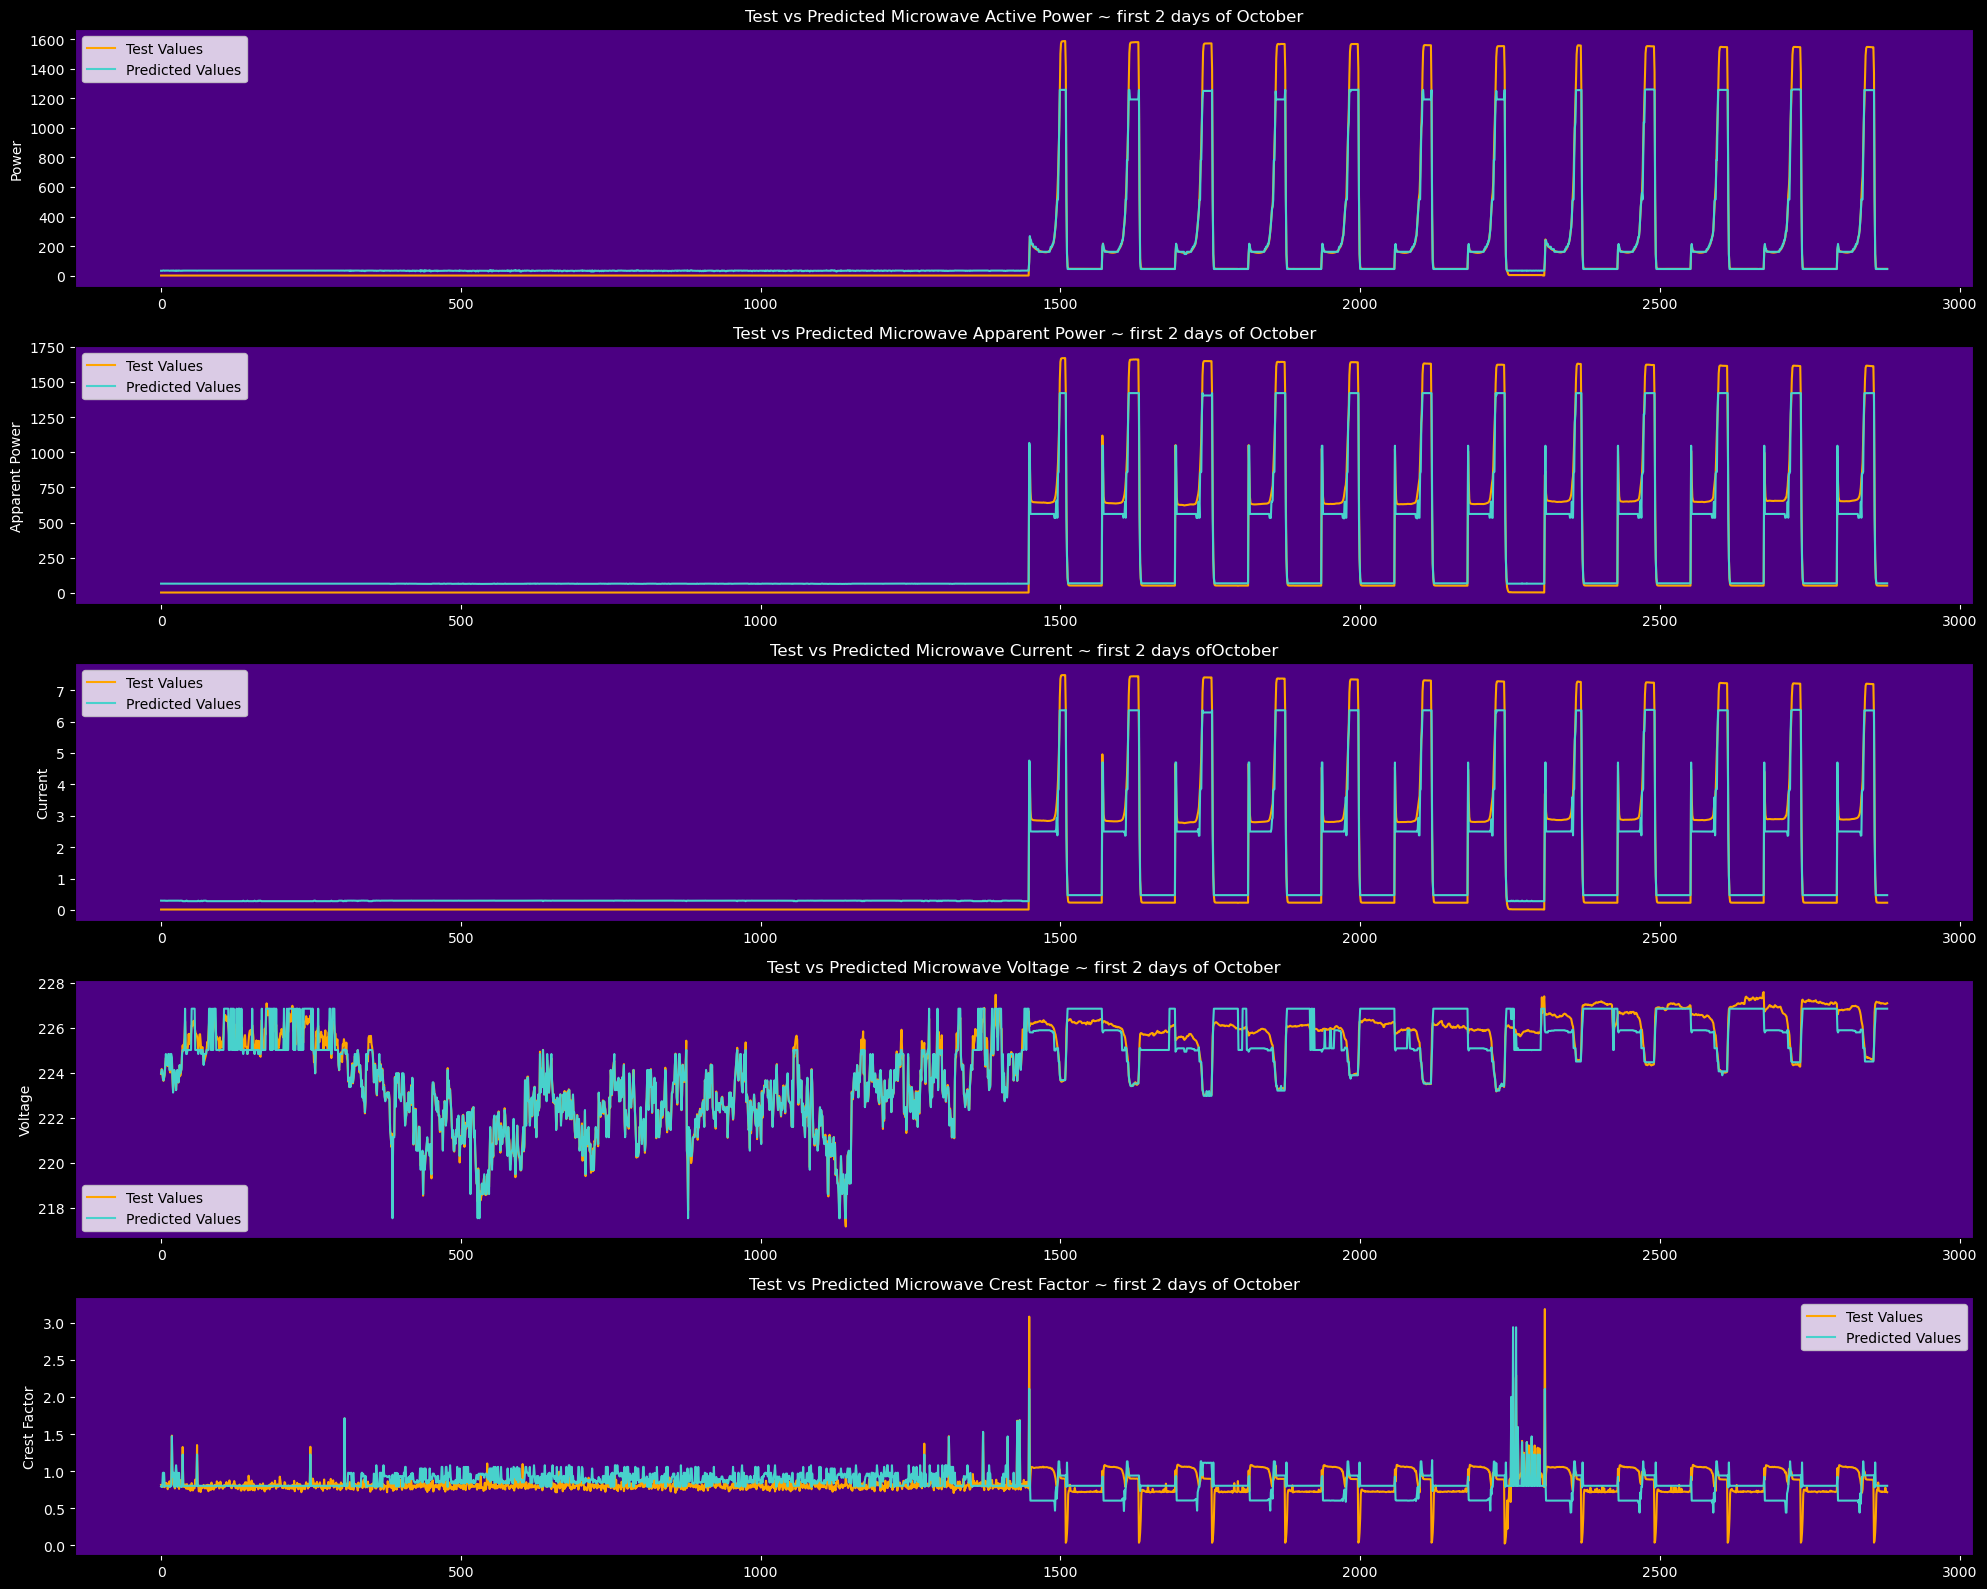

In [36]:
# on a first glance and given that we train on aggregated data only these plots look pretty much ok
# let's go to view the first two days of October now


import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(20, 16))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Microwave Active Power ~ first 2 days of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Microwave Apparent Power ~ first 2 days of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Microwave Current ~ first 2 days ofOctober',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Microwave Voltage ~ first 2 days of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Microwave Crest Factor ~ first 2 days of October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


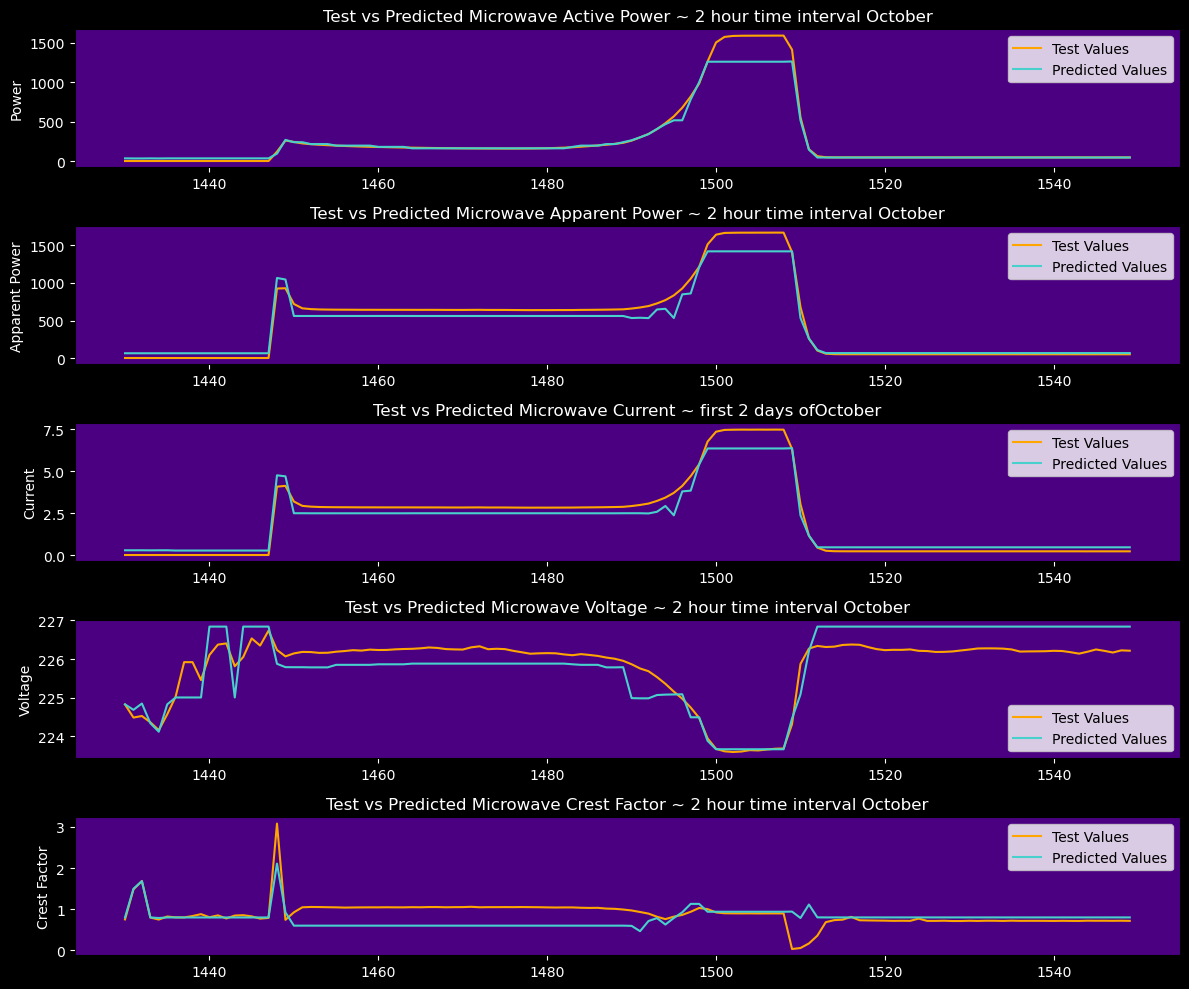

In [38]:
# now for a two time interval let's focus on a changing state (regarding active power mainly)
# let's say timesteps 1430 to 1550



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(12, 10))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[1430:1550], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[1430:1550], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Microwave Active Power ~ 2 hour time interval October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[1430:1550], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[1430:1550], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Microwave Apparent Power ~ 2 hour time interval October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[1430:1550], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[1430:1550], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Microwave Current ~ first 2 days ofOctober',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[1430:1550], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[1430:1550], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Microwave Voltage ~ 2 hour time interval October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[1430:1550], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[1430:1550], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Microwave Crest Factor ~ 2 hour time interval October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [39]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the hotplate device
input_cols_hotplate = aggregated_train.columns
output_cols_hotplate = hotplate_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_hotplate, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_hotplate:
    # Create a new rf model with the corresponding label column
    gbt = GBTRegressor(featuresCol='scaled_features', labelCol=output_col, maxIter=30,maxDepth=15 )
    
    # Update the stages of the pipeline with the new gbt model
    pipeline.setStages([assembler, scaler, gbt])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on hotplate_test dataset
    predictions = pipeline_model.transform(hotplate_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']

predicted_values_pwrA = predicted_values_pwrA.toPandas()
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()


Metrics for pwrA:
RMSE: 40.976299897312245
MSE: 1679.0571532744714
MAE: 34.98573411337885
R2: 0.956820178338024

Metrics for apwrA:
RMSE: 65.98139494302413
MSE: 4353.54447862733
MAE: 65.14569676933279
R2: 0.8894693676757824

Metrics for curA:
RMSE: 0.29592994694986363
MSE: 0.0875745335017491
MAE: 0.29214042628354764
R2: 0.8913796910160086

Metrics for vltA:
RMSE: 0.24549079915228034
MSE: 0.060265732468425245
MAE: 0.14165824592332166
R2: 0.9860805552297182

Metrics for screA:
RMSE: 0.08244133128534574
MSE: 0.006796573104100127
MAE: 0.025903468106773814
R2: 0.7117386632690745



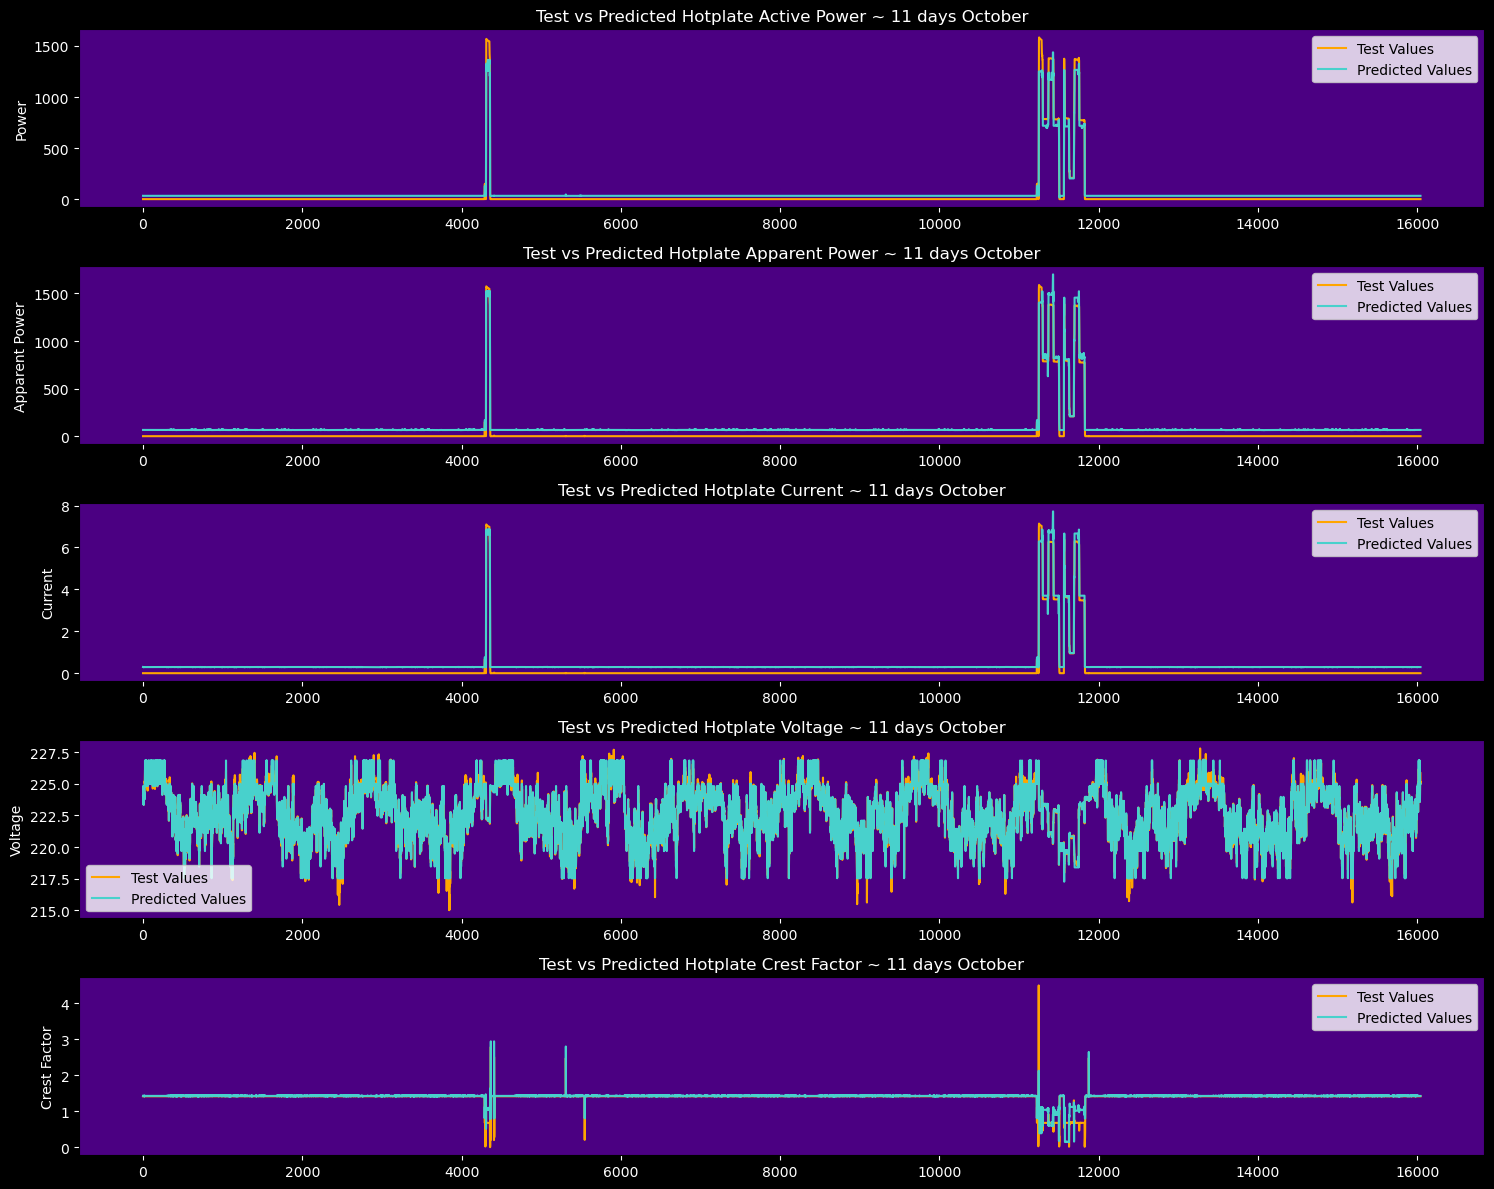

In [41]:
# ~ 11 first Oct days
import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Hotplate Active Power ~ 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Hotplate Apparent Power ~ 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Hotplate Current ~ 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Hotplate Voltage ~ 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Hotplate Crest Factor ~ 11 days October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


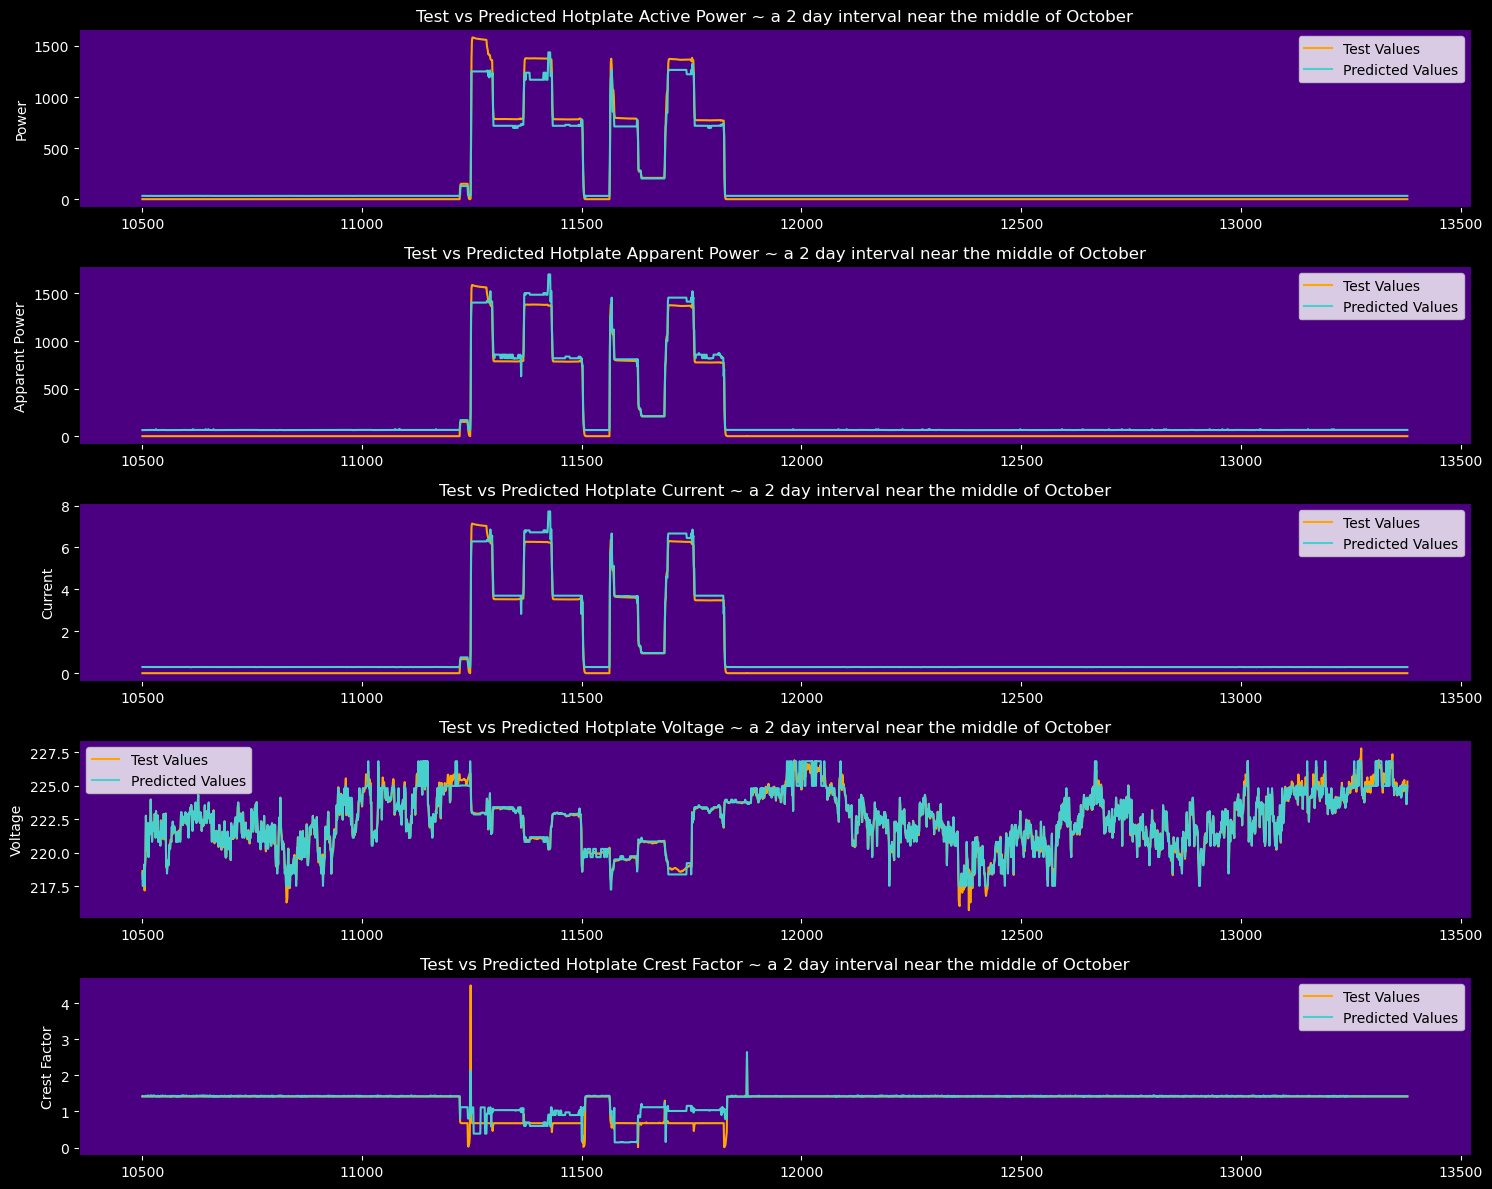

In [43]:
# since we can see that there is not much "action" in the first two days regarding mainly the active power
# we will zoom in to a 2 day interval at about 10500 to 13380 where multiple changes in active power occur
# ~ 11 first Oct days
import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[10500:13380], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[10500:13380], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Hotplate Active Power ~ a 2 day interval near the middle of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[10500:13380], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[10500:13380], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Hotplate Apparent Power ~ a 2 day interval near the middle of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[10500:13380], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[10500:13380], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Hotplate Current ~ a 2 day interval near the middle of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[10500:13380], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[10500:13380], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Hotplate Voltage ~ a 2 day interval near the middle of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[10500:13380], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[10500:13380], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Hotplate Crest Factor ~ a 2 day interval near the middle of October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [45]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the dishwasher device
input_cols_dishwasher = aggregated_train.columns
output_cols_dishwasher = dishwasher_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_dishwasher, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_dishwasher:
    # Create a new rf model with the corresponding label column
    gbt = GBTRegressor(featuresCol='scaled_features', labelCol=output_col, maxIter=30,maxDepth=15 )
    
    # Update the stages of the pipeline with the new gbt model
    pipeline.setStages([assembler, scaler, gbt])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on dishwasher_test dataset
    predictions = pipeline_model.transform(dishwasher_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']

predicted_values_pwrA = predicted_values_pwrA.toPandas()
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()


Metrics for pwrA:
RMSE: 127.82101142994637
MSE: 16338.210962974481
MAE: 50.657843090684956
R2: 0.8383208548979695

Metrics for apwrA:
RMSE: 122.05786142992332
MSE: 14898.121536846364
MAE: 72.32220188203574
R2: 0.8542678967009216

Metrics for curA:
RMSE: 0.5601740360656852
MSE: 0.3137949506821196
MAE: 0.32578548152321807
R2: 0.8548352821158239

Metrics for vltA:
RMSE: 0.29510874944856325
MSE: 0.08708917400109488
MAE: 0.1499504657324919
R2: 0.9820806283351304

Metrics for screA:
RMSE: 0.1868546996343058
MSE: 0.03491467877542663
MAE: 0.1537045249919608
R2: 0.8565979249711176



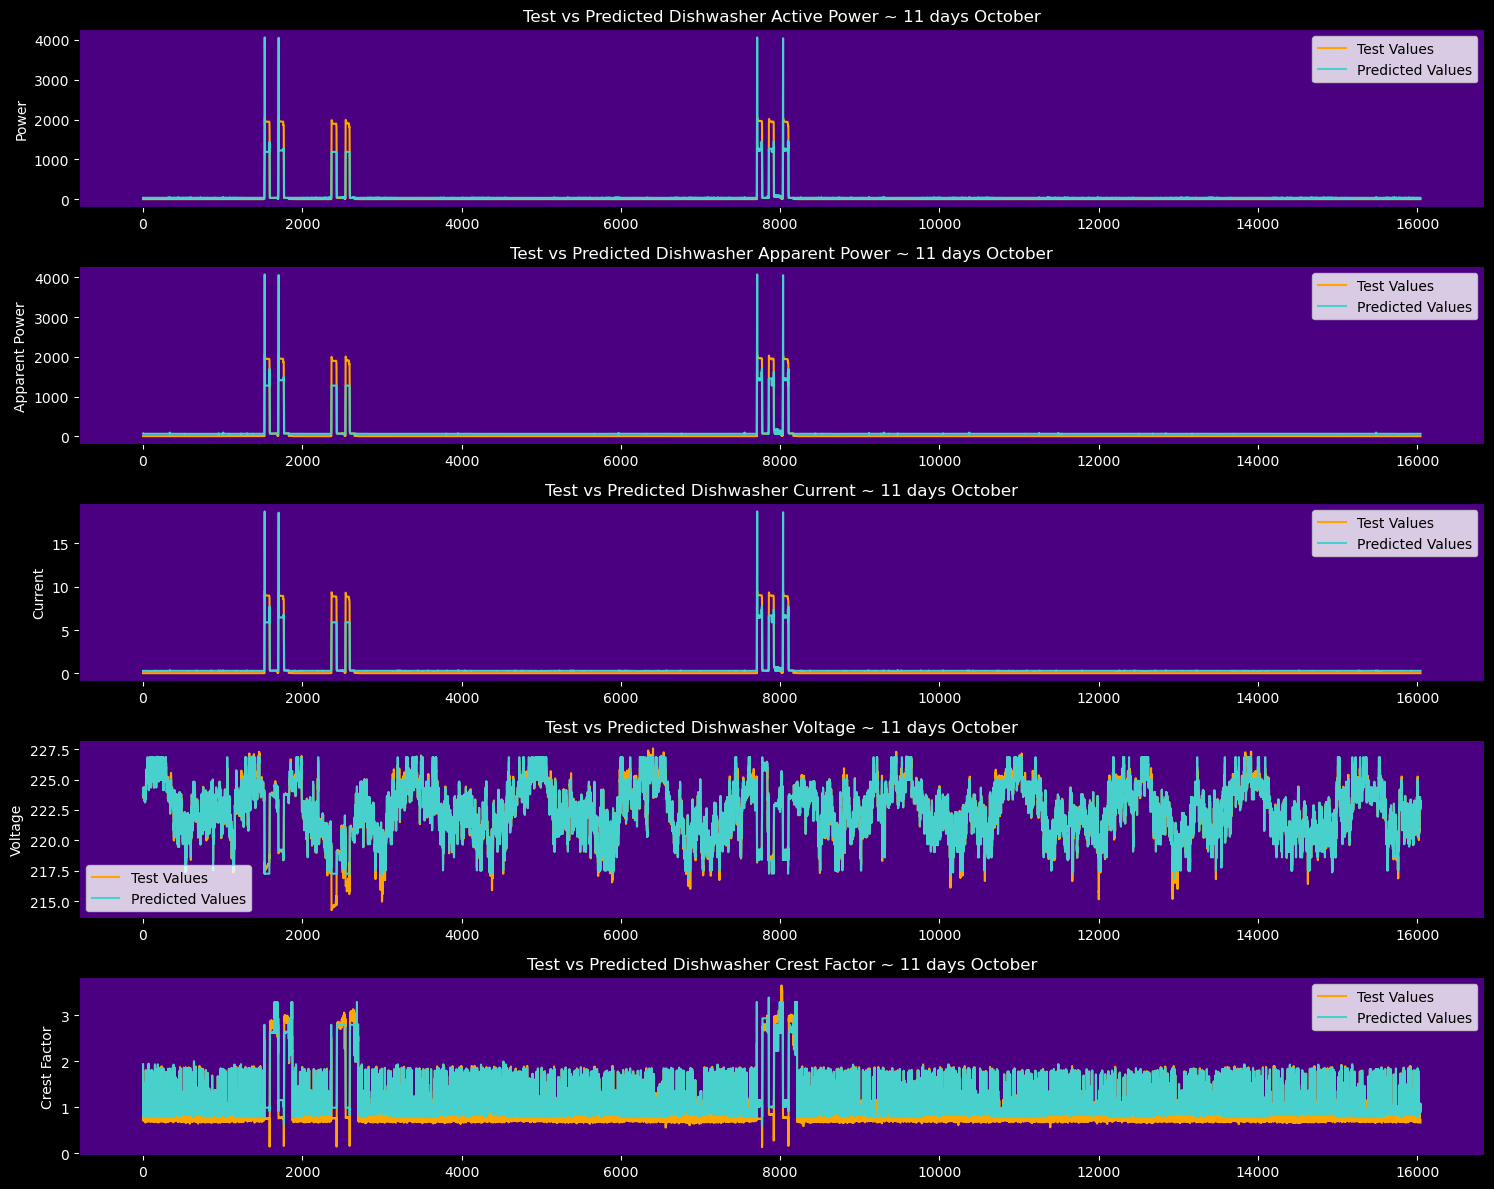

In [46]:
# ~ 11 first Oct days
import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Dishwasher Active Power ~ 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Dishwasher Apparent Power ~ 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Dishwasher Current ~ 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Dishwasher Voltage ~ 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Dishwasher Crest Factor ~ 11 days October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


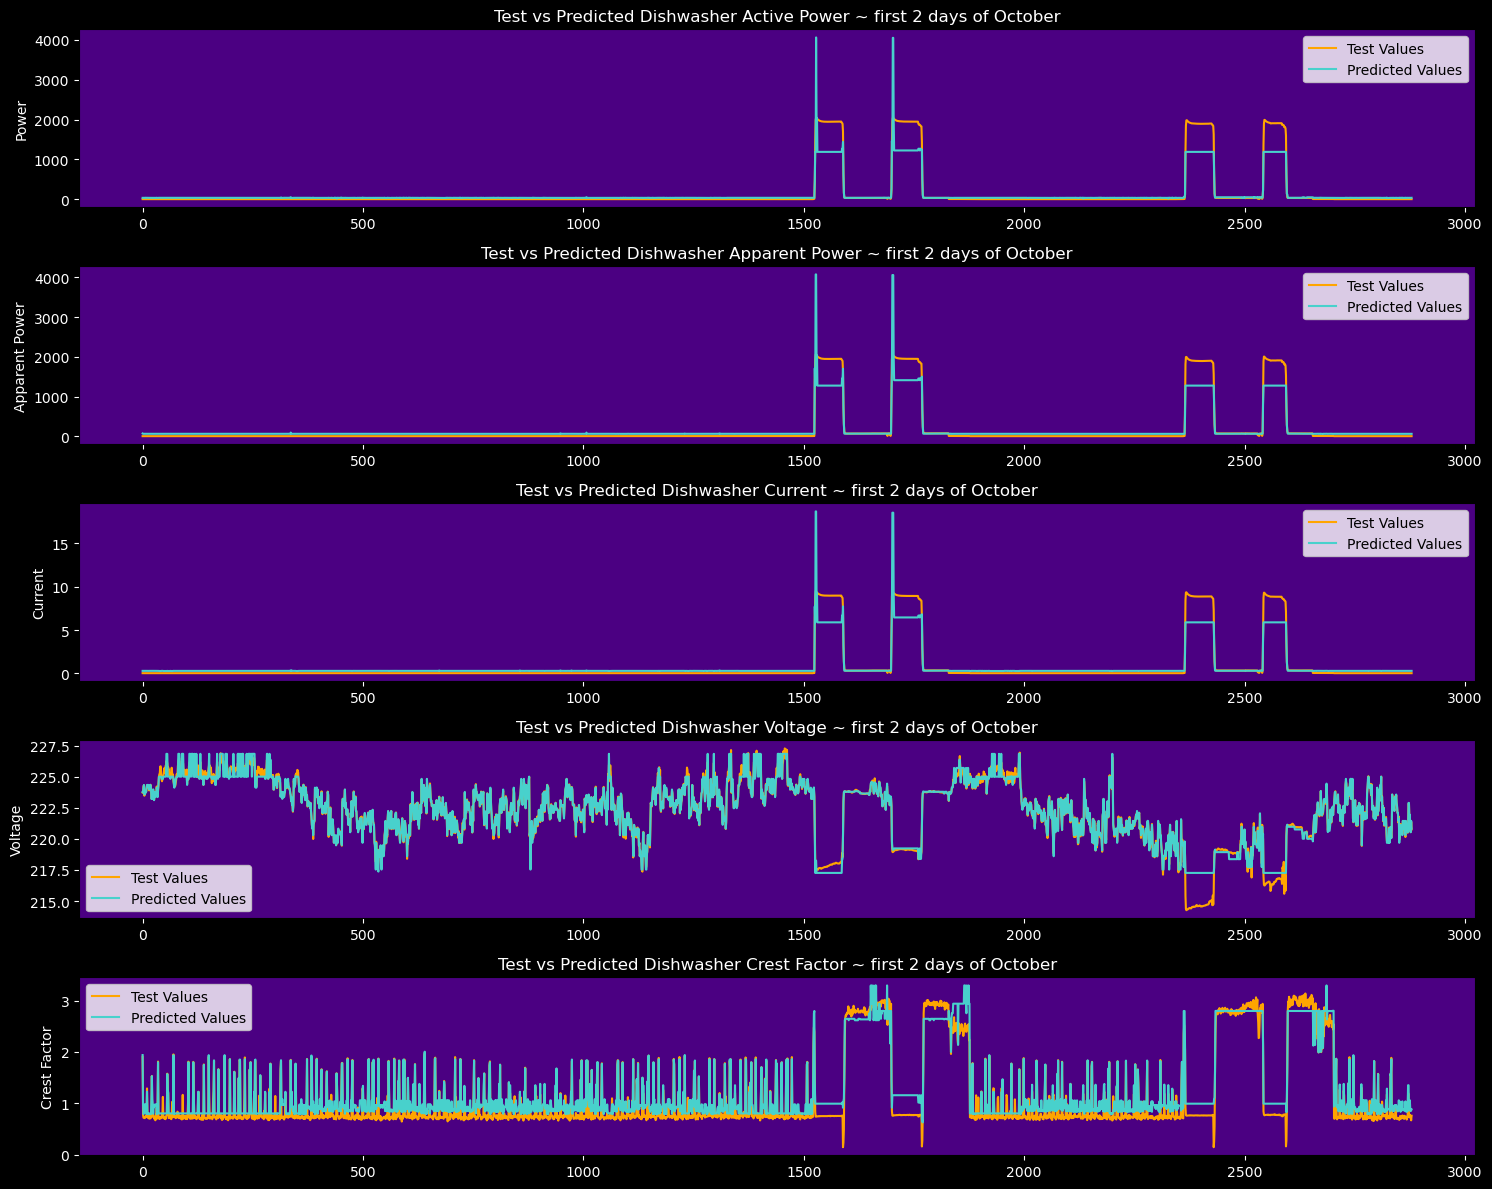

In [48]:
# let's see the first two days of October regarding the dishwasher:


import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Dishwasher Active Power ~ first 2 days of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Dishwasher Apparent Power ~ first 2 days of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Dishwasher Current ~ first 2 days of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Dishwasher Voltage ~ first 2 days of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Dishwasher Crest Factor ~ first 2 days of October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


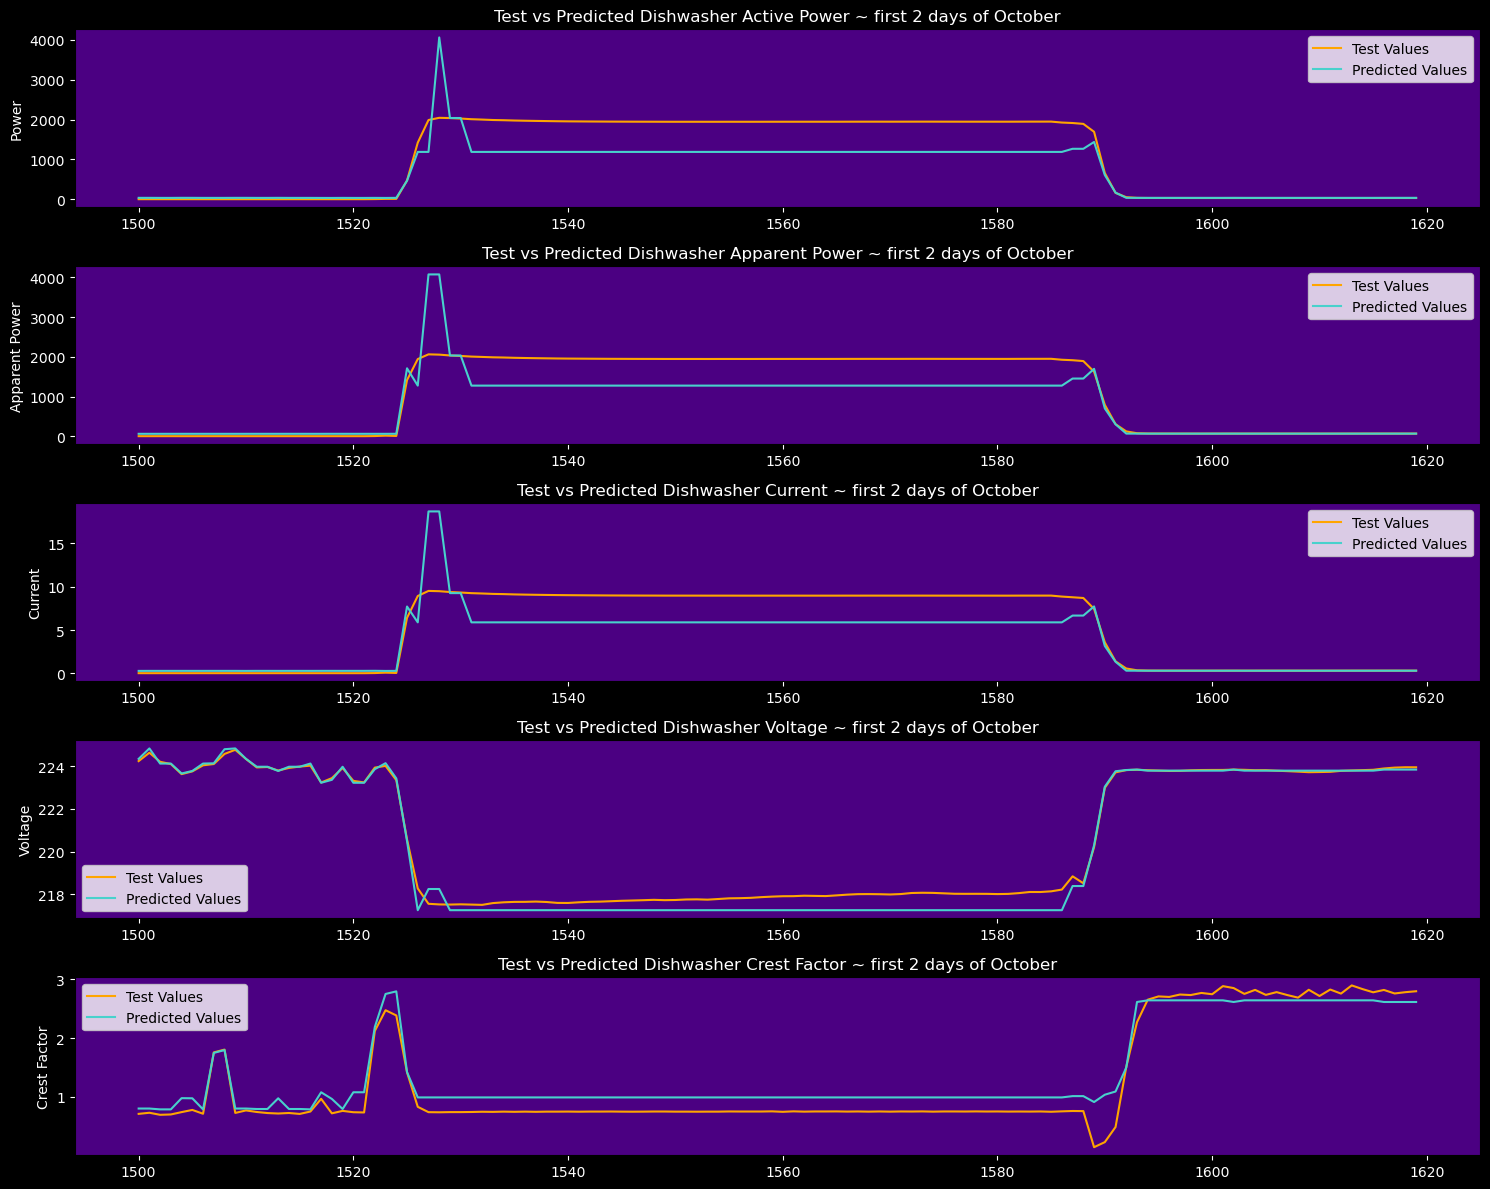

In [49]:
# the plots seem nice, now we will zoom in on a 2 hour interval of interest (regarding mainly dishwashers active power)
# let's say 1500-1620



import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[1500:1620], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[1500:1620], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Dishwasher Active Power ~ first 2 days of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[1500:1620], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[1500:1620], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Dishwasher Apparent Power ~ first 2 days of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[1500:1620], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[1500:1620], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Dishwasher Current ~ first 2 days of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[1500:1620], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[1500:1620], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Dishwasher Voltage ~ first 2 days of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[1500:1620], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[1500:1620], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Dishwasher Crest Factor ~ first 2 days of October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [55]:
water_heater_test

DataFrame[pwrC: double, apwrC: double, curC: double, vltC: double, screC: double]

In [60]:
# water heater (different phase of dcolection)
# since the data were collected in phase c not A we need to rename the collumns first
water_heater_train = water_heater_train.toDF('pwrA','apwrA','curA','vltA','screA')
water_heater_test = water_heater_test.toDF('pwrA','apwrA','curA','vltA','screA')
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorAssembler, MinMaxScaler

# Define the input and output column names for the water_heater device
input_cols_water_heater = aggregated_train.columns
output_cols_water_heater = water_heater_test.columns

# Create vector assembler for input columns
assembler = VectorAssembler(inputCols=input_cols_water_heater, outputCol='features')

# Create scaler
scaler = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Initialize an empty dictionary to store the predictions
predictions_dict = {}

# Create an empty pipeline
pipeline = Pipeline(stages=[assembler, scaler])

# Iterate over each output column
for output_col in output_cols_water_heater:
    # Create a new rf model with the corresponding label column
    gbt = GBTRegressor(featuresCol='scaled_features', labelCol=output_col, maxIter=30,maxDepth=15 )
    
    # Update the stages of the pipeline with the new gbt model
    pipeline.setStages([assembler, scaler, gbt])
    
    # Fit the updated pipeline on the aggregated_train dataset
    pipeline_model = pipeline.fit(aggregated_train)
    
    # Use the updated pipeline model to make predictions on water_heater_test dataset
    predictions = pipeline_model.transform(water_heater_test)
    
    # Select the predicted values for the current output column
    predicted_values = predictions.select(output_col, 'prediction')
    
    # Store the predicted values in the dictionary
    predictions_dict[output_col] = predicted_values
    
    # Calculate evaluation metrics using the RegressionEvaluator
    evaluator = RegressionEvaluator(labelCol = output_col, predictionCol='prediction')
    rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
    mse = evaluator.evaluate(predictions, {evaluator.metricName: 'mse'})
    mae = evaluator.evaluate(predictions, {evaluator.metricName: 'mae'})
    r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

    # Print the evaluation metrics
    print(f"Metrics for {output_col}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R2:", r2)
    print()

# Access the predictions for a specific output column
predicted_values_pwrA = predictions_dict['pwrA']
predicted_values_apwrA = predictions_dict['apwrA']
predicted_values_curA = predictions_dict['curA']
predicted_values_vltA = predictions_dict['vltA']
predicted_values_screA = predictions_dict['screA']

predicted_values_pwrA = predicted_values_pwrA.toPandas()
predicted_values_apwrA = predicted_values_apwrA.toPandas()
predicted_values_curA = predicted_values_curA.toPandas()
predicted_values_vltA = predicted_values_vltA.toPandas()
predicted_values_screA = predicted_values_screA.toPandas()


Metrics for pwrA:
RMSE: 33.33096265109184
MSE: 1110.9530712484789
MAE: 33.25933588332838
R2: -22871.814067366347



Metrics for apwrA:
RMSE: 57.3602585164046
MSE: 3290.1992570687667
MAE: 57.35128512791689
R2: -169573.47829398807

Metrics for curA:
RMSE: 0.2573821465057353
MSE: 0.0662455693398998
MAE: 0.2573512608907096
R2: -175437.89063733365

Metrics for vltA:
RMSE: 0.286466497407382
MSE: 0.08206305413685361
MAE: 0.1925536452753029
R2: 0.9752265236447787

Metrics for screA:
RMSE: 0.33052691784634985
MSE: 0.1092480434210077
MAE: 0.22412755025812442
R2: 0.5370647867567775



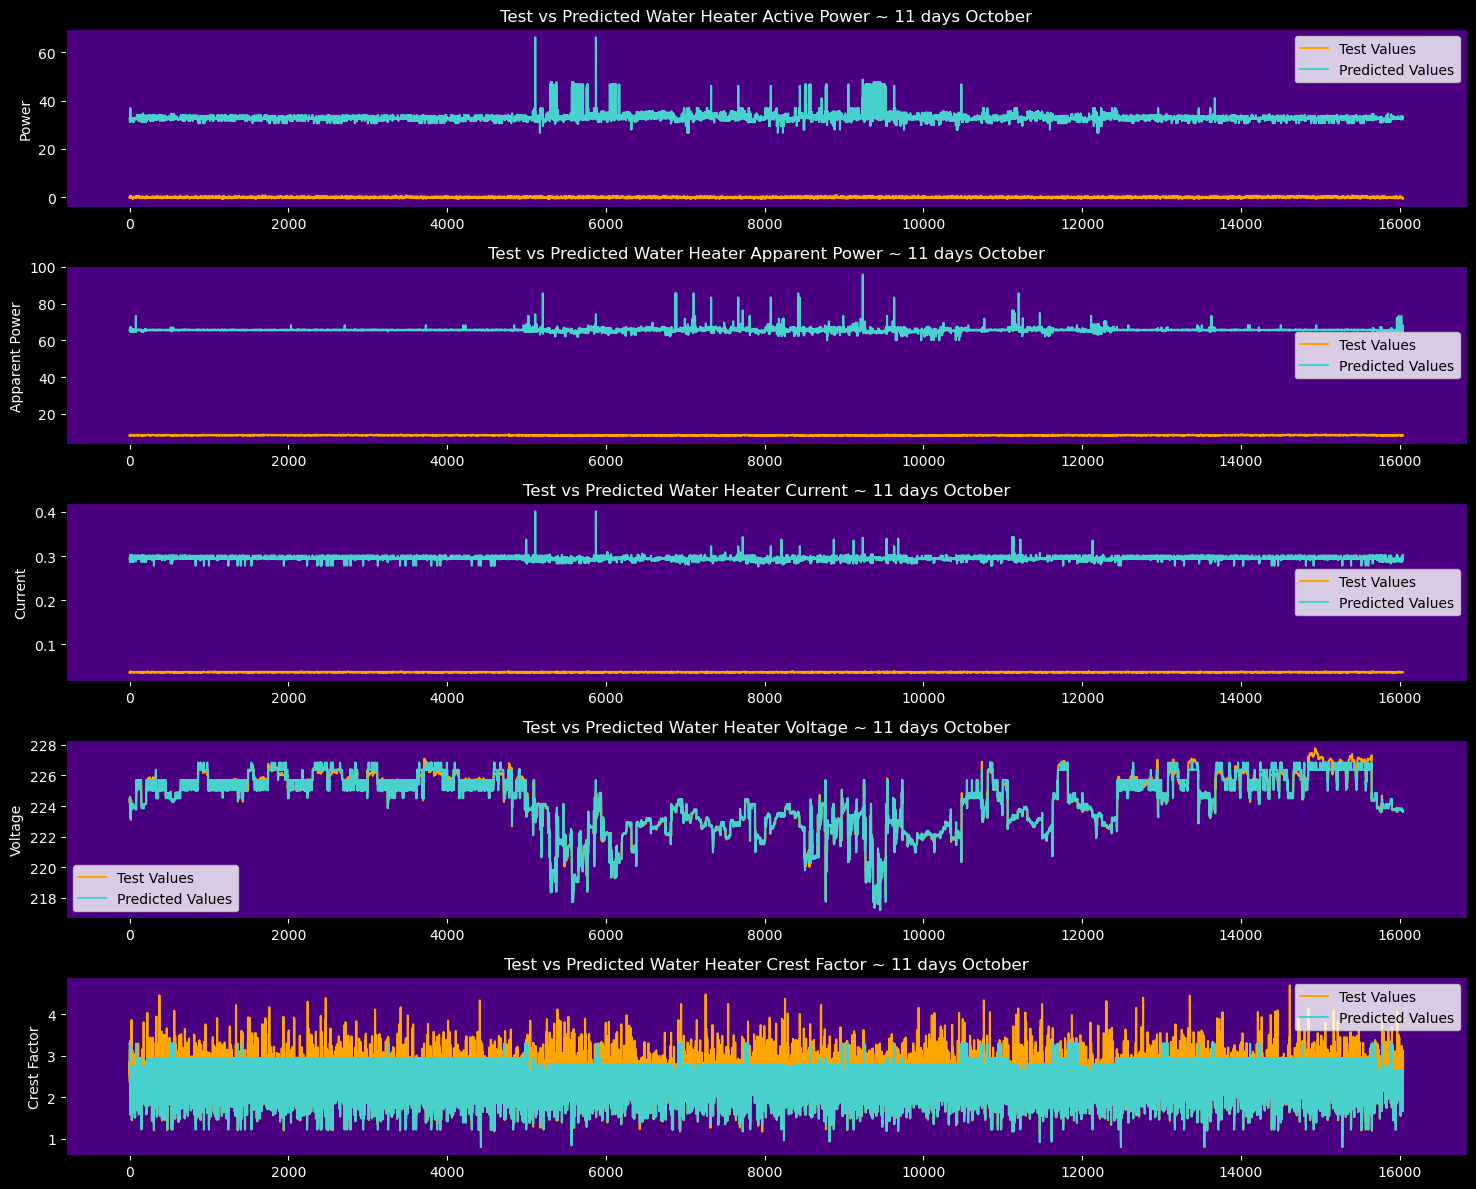

In [61]:
# ~ 11 first Oct days
import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Water Heater Active Power ~ 11 days October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Water Heater Apparent Power ~ 11 days October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Water Heater Current ~ 11 days October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Water Heater Voltage ~ 11 days October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Water Heater Crest Factor ~ 11 days October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


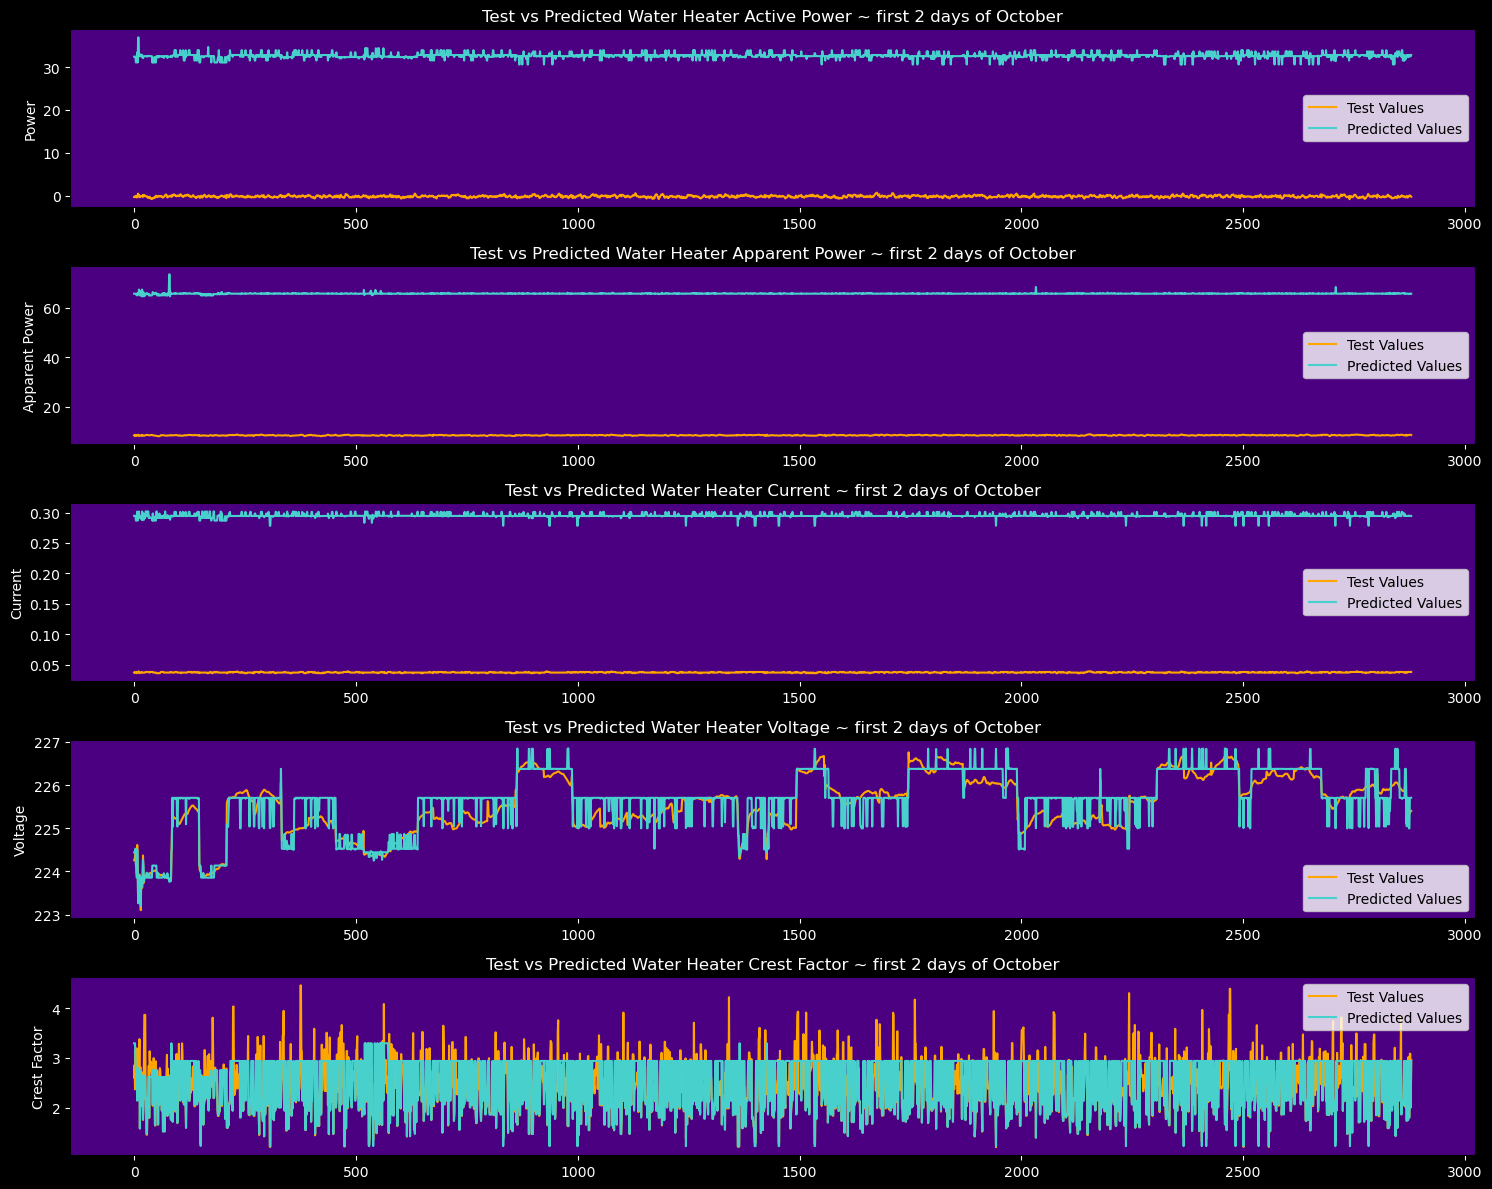

In [62]:
# the different phase collection shows here probably since it is the only appliance that active and apparent power seem way off,
# although a water heater has low energy consumption metrics and could be indistinguishable from the aggregated signal. Voltage
# and Crest factor seem fine though
# let's zoom in the first 2 days of October

import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:2880], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Water Heater Active Power ~ first 2 days of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:2880], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Water Heater Apparent Power ~ first 2 days of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:2880], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Water Heater Current ~ first 2 days of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:2880], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Water Heater Voltage ~ first 2 days of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:2880], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:2880], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Water Heater Crest Factor ~ first 2 days of October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


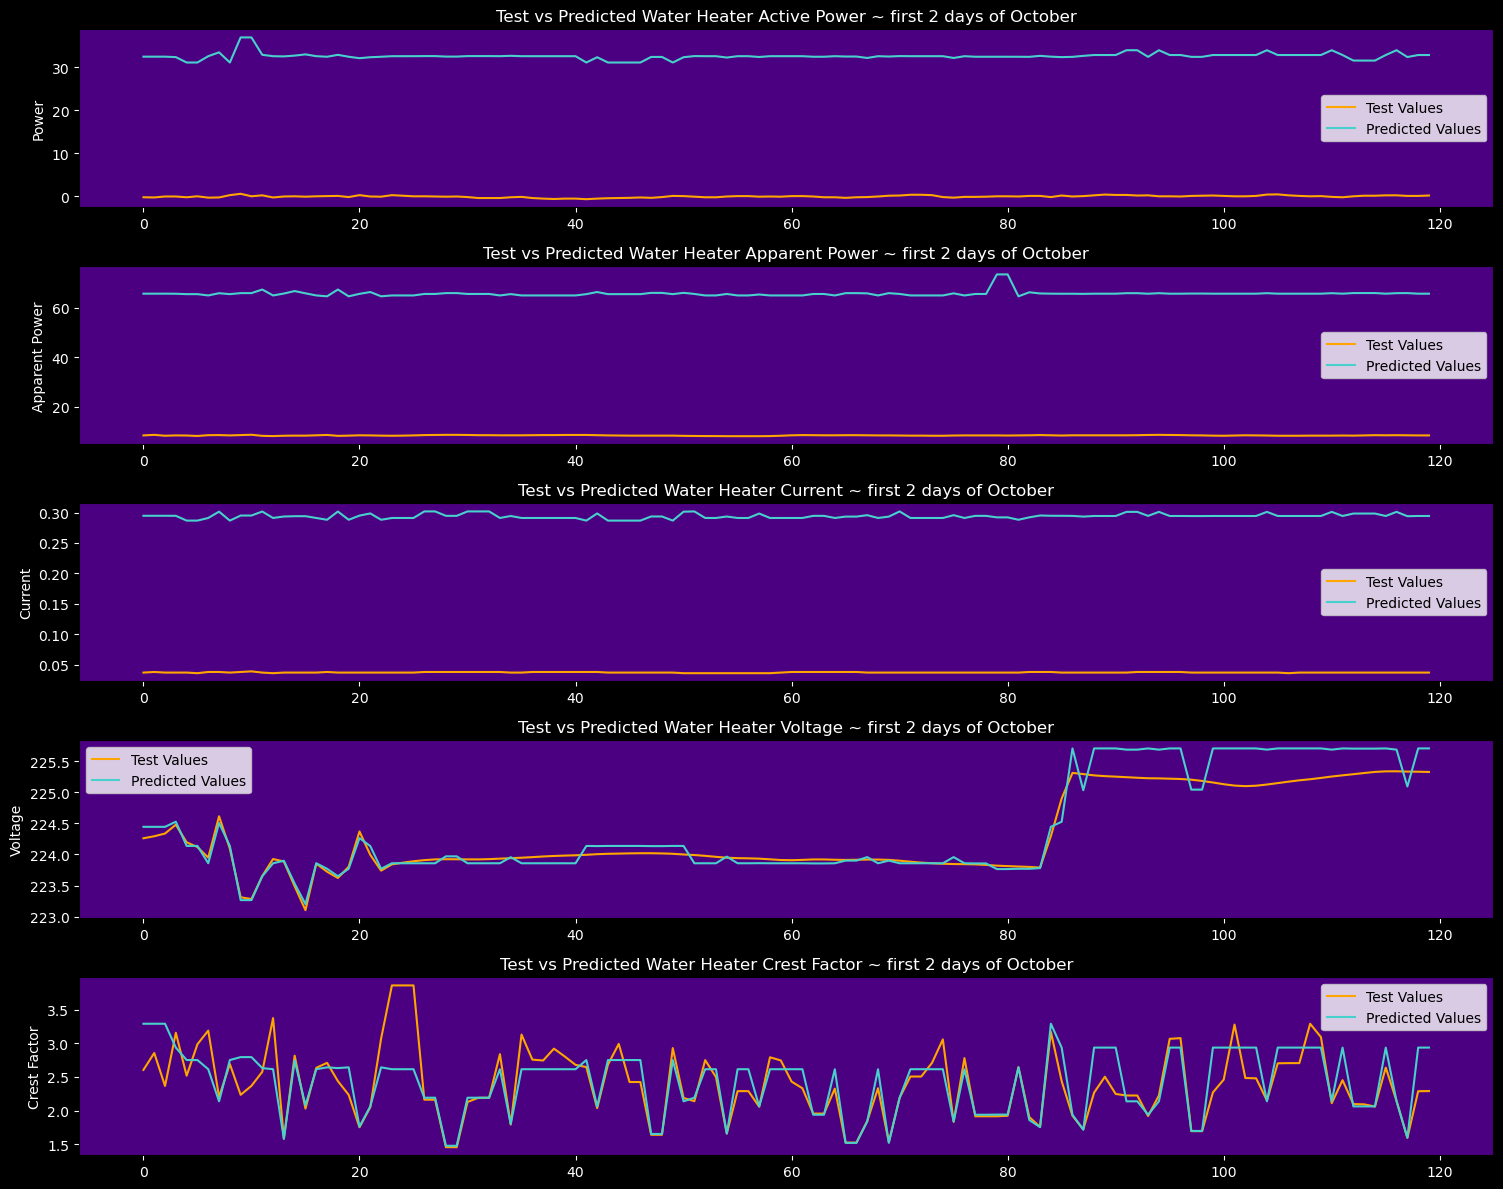

In [63]:
# and the first two hours as a 2 hour interval

import matplotlib.pyplot as plt



# Create subplots for each column
fig, axs = plt.subplots(5, 1, figsize=(15, 12))
fig.patch.set_facecolor('black')
for ax in axs:
    ax.set_facecolor('indigo')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
# Plot predicted vs test for each column
axs[0].plot(predicted_values_pwrA['pwrA'].iloc[:120], label='Test Values', color='orange')
axs[0].plot(predicted_values_pwrA['prediction'].iloc[:120], label='Predicted Values', color='mediumturquoise')
axs[0].set_ylabel('Power',color = 'white')
axs[0].set_title('Test vs Predicted Water Heater Active Power ~ first 2 days of October',color = 'white')
axs[0].legend()

axs[1].plot(predicted_values_apwrA['apwrA'].iloc[:120], label='Test Values', color='orange')
axs[1].plot(predicted_values_apwrA['prediction'].iloc[:120], label='Predicted Values', color='mediumturquoise')
axs[1].set_ylabel('Apparent Power',color = 'white')
axs[1].set_title('Test vs Predicted Water Heater Apparent Power ~ first 2 days of October',color = 'white')
axs[1].legend()

axs[2].plot(predicted_values_curA['curA'].iloc[:120], label='Test Values', color='orange')
axs[2].plot(predicted_values_curA['prediction'].iloc[:120], label='Predicted Values', color='mediumturquoise')
axs[2].set_ylabel('Current',color = 'white')
axs[2].set_title('Test vs Predicted Water Heater Current ~ first 2 days of October',color = 'white')
axs[2].legend()

axs[3].plot(predicted_values_vltA['vltA'].iloc[:120], label='Test Values', color='orange')
axs[3].plot(predicted_values_vltA['prediction'].iloc[:120], label='Predicted Values', color='mediumturquoise')
axs[3].set_ylabel('Voltage',color = 'white')
axs[3].set_title('Test vs Predicted Water Heater Voltage ~ first 2 days of October',color = 'white')
axs[3].legend()

axs[4].plot(predicted_values_screA['screA'].iloc[:120], label='Test Values', color='orange')
axs[4].plot(predicted_values_screA['prediction'].iloc[:120], label='Predicted Values', color='mediumturquoise')
axs[4].set_ylabel('Crest Factor',color = 'white')
axs[4].set_title('Test vs Predicted Water Heater Crest Factor ~ first 2 days of October',color = 'white')
axs[4].legend()


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()
